<font size=6><b>Lec00.MACD </font><br>
<font size=4 ><b>이동평균 수렴확한(Moving Average Convergence & Divergence)</b></font>
* 단기 이동평균선과 장기 이동평균선이 서로 멀어졌다, 가까워졌다를 반복하는 원리를 이용해 주가 흐름의 추세의 변화를 파악하는 보조지표</b></font>

In [64]:
from __future__ import (absolute_import, division, print_function, unicode_literals)
import backtrader as bt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
import datetime as dt

import pandas_datareader as pdr
import FinanceDataReader as fdr
from pykrx import stock


import yfinance as yf
import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')
sns.set()

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

이동평균선은 기간이 짧을수록 가장 최근의 주가 상황을 반영하는 선행성지표, 기간이 길수록 후행성 지표
최근 12일간의 이동평균선이 26일간의 이동평균선보다 선행하는 것.
주가 상승 시 : 12일선이 26일선 위에서 선행 - MACD 곡선 (+) : 기준선 위
주가 하락 시 : 12일선이 26일선 아래에서 선도 - MACD 곡선 (-) : 기준선 아래
        
        단기 이동평균선과 장기 이동평균선 간에 괴리가 가장 큰 시점을 찾기 위해서 존재
어느 시점에서 두 개의 이동평균선의 차이가 최대가 되는지를 판단 가능 : 대체로 두 곡선이 만나는 지점이 괴리가 가장 

In [289]:
def my_EMA(df, period = 20, column = 'Close') :
    return df[column].ewm(span=period, min_periods=period, adjust = False).mean()

def my_MACD(df, period_long = 26, period_short = 12, period_signal = 9, column = 'Close') :
    
    ShortEMA = my_EMA(df, period_short, column = column)
    LongEMA = my_EMA(df, period_long, column = column)
    df['MACD'] = ShortEMA - LongEMA
    df['Signal_Line'] = my_EMA(df, period_signal, column = 'MACD')
    df['MACD_Hist']= df['MACD']-df['Signal_Line']
    
    return df

In [103]:
def codefind(name):   #코드반환(한글입력 후 코드반환) 
    krx = fdr.StockListing('KRX')
    search = list(krx['Name'])
    for i in range(len(krx)):
        if (search[i]==name):
            print(krx['Symbol'][i])
            return
codefind('아모레퍼시픽')

090430


In [246]:
start  = "2005-01-01"
end    = "2022-03-31"
ticker = "009970"  
# ---------------------------------------
df = stock.get_market_ohlcv(start, end, ticker)
#df = stock.get_market_ohlcv("2021-01-01", "2021-12-31", "005930")
df.columns = ["Open","High","Low","Close","Volume"]
df.head()

,Open,High,Low,Close,Volume
날짜,,,,,
2005-01-03,6093,6197,6065,6180,190790
2005-01-04,6246,6265,6075,6189,201940
2005-01-05,6121,6425,6121,6360,372490
2005-01-06,6435,6502,6359,6502,397940
2005-01-07,6501,6757,6444,6559,598470


In [105]:
아모레퍼시픽 = my_MACD(df, period_long = 26, period_short = 12, period_signal = 9)
아모레퍼시픽.tail()

,Open,High,Low,Close,Volume,MACD,Signal_Line,MACD_Hist
날짜,,,,,,,,
2022-03-25,156500,157000,154500,155500,185696,-5295.004370,-3826.368606,-1468.635764
2022-03-28,155000,155000,150000,153000,403054,-5380.392677,-4137.173420,-1243.219257
2022-03-29,154500,160500,153500,159000,623902,-4907.344853,-4291.207707,-616.137147
2022-03-30,161000,162000,157500,160000,262890,-4401.027101,-4313.171586,-87.855516
2022-03-31,157500,160000,157000,160000,245191,-3954.185249,-4241.374318,287.189069


* 실선 : MACD(12일-26일) 지수이동평균선 - 가격변화에 빠른 반응
* 점선 : 신호선(MACD선의 9일 지수 이동평균선) - 가격변화에 늦은 반응
* 실선 - 점선 교차점 (매매신호)
* 골든크로스(매수) : MACD 곡선이 시그널 곡선을 상향 돌파
* 데드크로스(매도) : MACD 곡선이 시그널 곡선을 하향 돌파

-매도 2006-08-21  40410.00
+매수 2006-08-25  41561.00
-매도 2006-09-04  41111.00
+매수 2006-09-18  42011.00
-매도 2006-11-15  50913.00
+매수 2006-12-05  54014.00
-매도 2006-12-18  53714.00
+매수 2006-12-22  56515.00
-매도 2007-01-03  53814.00
+매수 2007-01-24  55914.00
-매도 2007-02-01  55514.00
+매수 2007-02-14  56615.00
-매도 2007-02-23  55314.00
+매수 2007-03-27  54014.00
-매도 2007-03-28  51913.00
+매수 2007-04-10  51913.00
-매도 2007-05-23  65217.00
+매수 2007-05-29  75019.00
-매도 2007-06-05  69518.00
+매수 2007-07-31  66217.00
-매도 2007-08-01  64717.00
+매수 2007-08-24  59415.00
-매도 2007-10-01  67217.00
+매수 2007-10-11  69918.00
-매도 2007-10-18  66017.00
+매수 2007-10-19  68718.00
-매도 2007-10-22  66717.00
+매수 2007-10-24  69618.00
-매도 2007-11-14  82021.00
+매수 2007-12-27  72119.00
-매도 2008-01-16  65617.00
+매수 2008-02-20  61816.00
-매도 2008-03-12  55414.00
+매수 2008-03-27  53014.00
-매도 2008-05-19  61416.00
+매수 2008-06-10  62616.00
-매도 2008-06-13  61416.00
+매수 2008-06-17  63816.00
-매도 2008-06-30  64817.00
+매수 2008-07-23  59515.00


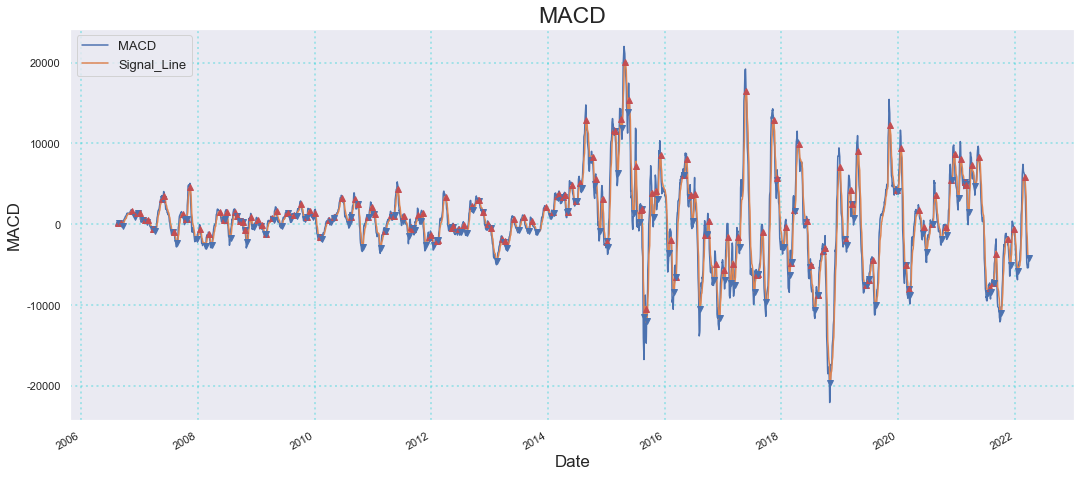

In [44]:
fig, ax1 = plt.subplots(figsize = (25, 5))
df[['MACD','Signal_Line']].plot(figsize = (18,8),ax=ax1)

for i in range(len(df.index)):
    if (df["MACD"].values[i] >= df["Signal_Line"].values[i]) and (df["MACD"].values[i-1] < df["Signal_Line"].values[i-1]) :    #콜든크로스(매수)
        print(f"+매수 {pd.to_datetime(df.index.values[i]).strftime('%Y-%m-%d')}  {df['Close'].values[i]:.2f}")
        ax1.plot(df.index.values[i], df['Signal_Line'].values[i], 'bv')
    elif (df["MACD"].values[i] <= df["Signal_Line"].values[i]) and (df["MACD"].values[i-1] > df["Signal_Line"].values[i-1]):  #데드크로스(매도)
        print(f"-매도 {pd.to_datetime(df.index.values[i]).strftime('%Y-%m-%d')}  {df['Close'].values[i]:.2f}")
        ax1.plot(df.index.values[i], df['Signal_Line'].values[i], 'r^') 
        

ax1.grid(b=True, color='DarkTurquoise', alpha=0.3, linestyle=':', linewidth=2)
ax1.legend( loc='upper left', fontsize = 13)
plt.xlabel('Date', fontsize = 17)
plt.ylabel('MACD', fontsize = 17)
plt.title('MACD', position = (0.5,1.05), fontsize = 23);

In [49]:
import talib
from talib import abstract

In [50]:
macd, macdsignal, macdhist = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

In [51]:
macd.tail()

날짜
2022-03-25   -5295.004370
2022-03-28   -5380.392677
2022-03-29   -4907.344853
2022-03-30   -4401.027101
2022-03-31   -3954.185249
dtype: float64

In [52]:
macdsignal.tail()

날짜
2022-03-25   -3826.368606
2022-03-28   -4137.173420
2022-03-29   -4291.207707
2022-03-30   -4313.171586
2022-03-31   -4241.374318
dtype: float64

In [53]:
macdhist.tail()

날짜
2022-03-25   -1468.635764
2022-03-28   -1243.219257
2022-03-29    -616.137147
2022-03-30     -87.855516
2022-03-31     287.189069
dtype: float64

In [54]:
df.tail()

,Open,High,Low,Close,Volume,MACD,Signal_Line,MACD_Hist
날짜,,,,,,,,
2022-03-25,156500,157000,154500,155500,185696,-5295.004370,-3826.368606,-1468.635764
2022-03-28,155000,155000,150000,153000,403054,-5380.392677,-4137.173420,-1243.219257
2022-03-29,154500,160500,153500,159000,623902,-4907.344853,-4291.207707,-616.137147
2022-03-30,161000,162000,157500,160000,262890,-4401.027101,-4313.171586,-87.855516
2022-03-31,157500,160000,157000,160000,245191,-3954.185249,-4241.374318,287.189069


In [55]:
import pandas as pd
import datetime as dt
from pykrx import stock
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')
sns.set()

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

In [304]:
start  = "2005-01-01"
end    = "2022-03-31"
ticker = "000660"    
# ---------------------------------------
df = stock.get_market_ohlcv(start, end, ticker)
#df = stock.get_market_ohlcv("2021-01-01", "2021-12-31", "005930")
df.columns = ["Open","High","Low","Close","Volume"]
df.head()

,Open,High,Low,Close,Volume
날짜,,,,,
2005-01-03,11800,11800,11550,11600,3120279
2005-01-04,11550,11800,11350,11750,5562528
2005-01-05,11600,11850,11500,11850,4775735
2005-01-06,11700,12300,11600,11900,9309124
2005-01-07,12000,12100,11500,11700,4783719


In [230]:
삼성전자 = my_MACD(df, period_long = 26, period_short = 12, period_signal = 9)
삼성전자.tail()

,Open,High,Low,Close,Volume,MACD,Signal_Line,MACD_Hist
날짜,,,,,,,,
2022-03-25,70100,70200,69600,69800,12986010,-962.428849,-1042.115304,79.686454
2022-03-28,69500,69900,69200,69700,12619289,-948.784383,-1023.449120,74.664736
2022-03-29,70000,70300,69800,70200,13686208,-887.395877,-996.238471,108.842594
2022-03-30,70300,70500,69800,69900,12670187,-853.118319,-967.614441,114.496121
2022-03-31,69900,70200,69600,69600,12510366,-840.472161,-942.185985,101.713824


-매도 2005-02-23  10220.00
+매수 2005-04-01  10240.00
-매도 2005-04-15  9830.00
+매수 2005-05-09  9500.00
-매도 2005-06-07  9610.00
+매수 2005-06-13  9960.00
-매도 2005-06-22  9860.00
+매수 2005-06-23  9960.00
-매도 2005-06-24  9820.00
+매수 2005-07-01  10020.00
-매도 2005-08-04  11320.00
+매수 2005-09-07  11580.00
-매도 2005-09-26  11940.00
+매수 2005-11-02  11500.00
-매도 2005-11-23  12140.00
+매수 2005-12-06  12600.00
-매도 2005-12-13  12360.00
+매수 2005-12-22  12680.00
-매도 2006-01-18  13600.00
+매수 2006-01-26  14320.00
-매도 2006-02-03  14080.00
+매수 2006-03-02  13720.00
-매도 2006-03-03  13040.00
+매수 2006-03-21  12700.00
-매도 2006-03-22  12280.00
+매수 2006-03-28  12560.00
-매도 2006-05-02  12980.00
+매수 2006-06-23  11360.00
-매도 2006-07-19  11600.00
+매수 2006-07-20  11960.00
-매도 2006-09-06  13080.00
+매수 2006-09-19  13440.00
-매도 2006-09-22  13080.00
+매수 2006-11-09  12620.00
-매도 2006-11-28  12600.00
+매수 2006-12-28  12260.00
-매도 2007-01-05  11900.00
+매수 2007-01-15  12240.00
-매도 2007-01-29  11560.00
+매수 2007-02-06  11740.00
-매도 200

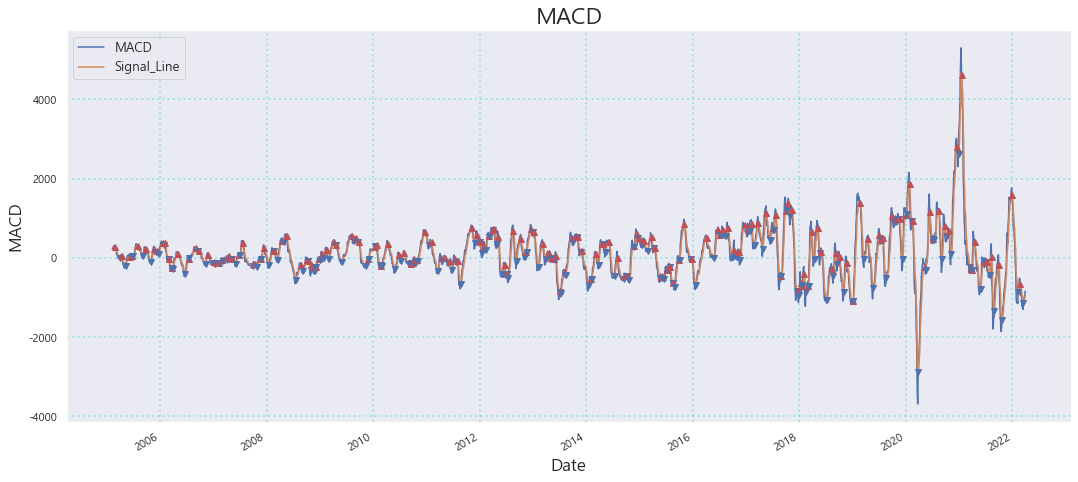

In [231]:
fig, ax1 = plt.subplots(figsize = (25, 5))
삼성전자[['MACD','Signal_Line']].plot(figsize = (18,8),ax=ax1)

for i in range(len(df.index)):
    if (삼성전자["MACD"].values[i] >= 삼성전자["Signal_Line"].values[i]) and (삼성전자["MACD"].values[i-1] < 삼성전자["Signal_Line"].values[i-1]) :    #콜든크로스(매수)
        print(f"+매수 {pd.to_datetime(삼성전자.index.values[i]).strftime('%Y-%m-%d')}  {삼성전자['Close'].values[i]:.2f}")
        ax1.plot(df.index.values[i], 삼성전자['Signal_Line'].values[i], 'bv')
    elif (삼성전자["MACD"].values[i] <= 삼성전자["Signal_Line"].values[i]) and (삼성전자["MACD"].values[i-1] > 삼성전자["Signal_Line"].values[i-1]):  #데드크로스(매도)
        print(f"-매도 {pd.to_datetime(삼성전자.index.values[i]).strftime('%Y-%m-%d')}  {삼성전자['Close'].values[i]:.2f}")
        ax1.plot(삼성전자.index.values[i], 삼성전자['Signal_Line'].values[i], 'r^') 
        

ax1.grid(b=True, color='DarkTurquoise', alpha=0.3, linestyle=':', linewidth=2)
ax1.legend( loc='upper left', fontsize = 13)
plt.xlabel('Date', fontsize = 17)
plt.ylabel('MACD', fontsize = 17)
plt.title('MACD', position = (0.5,1.05), fontsize = 23);

In [234]:
#삼성전자
from datetime import datetime
import backtrader as bt
# from backtrader import Indicator, MovAv
import locale

locale.setlocale(locale.LC_ALL, 'ko_KR')

# Create a subclass of Strategy to define the indicators and logic
class MACD(bt.Strategy):
    params = (
    # Standard MACD Parameters
    ('macd1', 12),
    ('macd2', 26),
    ('macdsig', 9),
    ('atrperiod', 14),  # ATR Period (standard)
    ('atrdist', 3.0),   # ATR distance for stop price
    ('smaperiod', 30),  # SMA Period (pretty standard)
    ('dirperiod', 10),  # Lookback period to consider SMA trend direction 
    )

    def __init__(self):
        print("---------------",self.data.close[0])#0 
        print("---------------",self.data.open[0])#4
        self.macd = bt.indicators.MACD(self.data,
                                       period_me1=self.p.macd1,
                                       period_me2=self.p.macd2,
                                       period_signal=self.p.macdsig)

        # Cross of macd.macd and macd.signal
        self.mcross = bt.indicators.CrossOver(self.macd.macd, self.macd.signal)
        self.holding = 0
        
    def next(self):
        current_stock_price = self.data.close[0]
       
        if not self.position:  # not in the market
            if self.mcross[0] > 0.0 and self.macd > self.macd.signal:
                available_stocks = self.broker.getcash() / current_stock_price
                self.buy(size=1)
        elif self.mcross[0] < 0.0 and self.macd < self.macd.signal:
            self.sell(size=1)

    
    def notify_order(self, order):
        if order.status not in [order.Completed]:
            return

        if order.isbuy():
            action = 'Buy'
        elif order.issell():
            action = 'Sell'

        stock_price = self.data.close[0]
        cash = self.broker.getcash()
        value = self.broker.getvalue()
        self.holding += order.size

        print('%s[%d] holding[%d] price[%d] cash[%.2f] value[%.2f]'
              % (action, abs(order.size), self.holding, stock_price, cash, value))


cerebro = bt.Cerebro()  # create a "Cerebro" engine instance
cerebro.broker.setcash(100000)
cerebro.broker.setcommission(0.002)


data = bt.feeds.PandasData(dataname=df)
cerebro.adddata(data)  # Add the data feed

cerebro.addstrategy(MACD)  # Add the trading strategy

start_value = cerebro.broker.getvalue()
cerebro.run()  # run it all
final_value = cerebro.broker.getvalue()

print('* start value : %s won' % locale.format_string('%d', start_value, grouping=True))
print('* final value : %s won' % locale.format_string('%d', final_value, grouping=True))
print('* earning rate : %.2f %%' % ((final_value - start_value) / start_value * 100.0))

# cerebro.plot(style='candlestick',barup='red',bardown='blue',xtight=True,ytight=True, grid=True)

--------------- 69600.0
--------------- 69900.0
Buy[1] holding[1] price[10340] cash[89739.52] value[100079.52]
Sell[1] holding[0] price[9520] cash[99190.58] value[99190.58]
Buy[1] holding[1] price[9540] cash[89611.46] value[99151.46]
Sell[1] holding[0] price[9550] cash[99152.34] value[99152.34]
Buy[1] holding[1] price[9930] cash[89172.42] value[99102.42]
Sell[1] holding[0] price[9960] cash[99012.70] value[99012.70]
Buy[1] holding[1] price[9820] cash[89072.86] value[98892.86]
Sell[1] holding[0] price[9770] cash[98833.30] value[98833.30]
Buy[1] holding[1] price[10060] cash[88713.10] value[98773.10]
Sell[1] holding[0] price[11060] cash[99910.66] value[99910.66]
Buy[1] holding[1] price[11740] cash[88187.26] value[99927.26]
Sell[1] holding[0] price[11860] cash[100123.34] value[100123.34]
Buy[1] holding[1] price[11740] cash[88339.82] value[100079.82]
Sell[1] holding[0] price[12160] cash[100675.10] value[100675.10]
Buy[1] holding[1] price[12820] cash[88049.90] value[100869.90]
Sell[1] holding

Sell[1] holding[0] price[24020] cash[82341.57] value[82341.57]
Buy[1] holding[1] price[25740] cash[56389.77] value[82129.77]
Sell[1] holding[0] price[25580] cash[81738.97] value[81738.97]
Buy[1] holding[1] price[26860] cash[54906.41] value[81766.41]
Sell[1] holding[0] price[26600] cash[81651.81] value[81651.81]
Buy[1] holding[1] price[27900] cash[54257.13] value[82157.13]
Sell[1] holding[0] price[27360] cash[81501.53] value[81501.53]
Buy[1] holding[1] price[28360] cash[52745.14] value[81105.14]
Sell[1] holding[0] price[28420] cash[80988.54] value[80988.54]
Buy[1] holding[1] price[29800] cash[51329.34] value[81129.34]
Sell[1] holding[0] price[29540] cash[80509.86] value[80509.86]
Buy[1] holding[1] price[27000] cash[53395.74] value[80395.74]
Sell[1] holding[0] price[25820] cash[79343.74] value[79343.74]
Buy[1] holding[1] price[26820] cash[52791.74] value[79611.74]
Sell[1] holding[0] price[25140] cash[78001.22] value[78001.22]
Buy[1] holding[1] price[25620] cash[52129.58] value[77749.58]


In [278]:
엔씨소프트 = my_MACD(df, period_long = 26, period_short = 12, period_signal = 9)
엔씨소프트.tail()

,Open,High,Low,Close,Volume,MACD,Signal_Line,MACD_Hist
날짜,,,,,,,,
2022-03-25,464500,469000,462000,463500,69691,-11488.891328,-18440.293002,6951.401674
2022-03-28,460500,460500,444000,457000,108484,-10855.981382,-16923.430678,6067.449296
2022-03-29,457000,468000,455500,462000,71994,-9837.536479,-15506.251838,5668.715359
2022-03-30,465000,473500,462000,465000,96179,-8688.184644,-14142.638399,5454.453755
2022-03-31,467000,479500,464500,467500,140432,-7489.254464,-12811.961612,5322.707148


In [305]:
def my_EMA(df, period = 20, column = 'Close') :
    return df[column].ewm(span=period, min_periods=period, adjust = False).mean()

def my_MACD(df, period_long = 26, period_short = 12, period_signal = 9, column = 'Close') :
    
    ShortEMA = my_EMA(df, period_short, column = column)
    LongEMA = my_EMA(df, period_long, column = column)
    df['MACD'] = ShortEMA - LongEMA
    df['Signal_Line'] = my_EMA(df, period_signal, column = 'MACD')
    df['MACD_Hist']= df['MACD']-df['Signal_Line']
    
    return df

-매도 2005-03-02  71700.00
+매수 2005-03-11  76100.00
-매도 2005-04-11  74600.00
+매수 2005-04-26  76800.00
-매도 2005-05-16  74800.00
+매수 2005-05-19  82500.00
-매도 2005-06-09  84800.00
+매수 2005-07-07  82600.00
-매도 2005-07-18  77200.00
+매수 2005-08-01  80500.00
-매도 2005-08-10  75300.00
+매수 2005-08-29  72200.00
-매도 2005-10-19  86900.00
+매수 2005-10-24  96300.00
-매도 2005-10-28  92600.00
+매수 2005-10-31  97500.00
-매도 2005-11-04  97000.00
+매수 2005-12-19  86300.00
-매도 2005-12-23  78200.00
+매수 2006-01-03  82200.00
-매도 2006-01-19  77400.00
+매수 2006-02-01  75300.00
-매도 2006-02-08  71200.00
+매수 2006-02-24  65100.00
-매도 2006-03-07  59000.00
+매수 2006-03-10  62000.00
-매도 2006-05-04  70000.00
+매수 2006-06-12  56100.00
-매도 2006-07-05  50600.00
+매수 2006-07-28  43400.00
-매도 2006-09-11  50000.00
+매수 2006-09-15  57100.00
-매도 2006-10-02  57800.00
+매수 2006-10-19  59700.00
-매도 2006-11-09  60000.00
+매수 2006-12-04  59000.00
-매도 2006-12-12  55500.00
+매수 2007-01-11  55000.00
-매도 2007-02-07  55100.00
+매수 2007-03-09  54400.00


-매도 2021-04-21  857000.00
+매수 2021-05-10  878000.00
-매도 2021-06-17  824000.00
+매수 2021-07-01  834000.00
-매도 2021-07-02  818000.00
+매수 2021-07-05  826000.00
-매도 2021-07-09  800000.00
+매수 2021-07-16  839000.00
-매도 2021-08-11  790000.00
+매수 2021-08-19  853000.00
-매도 2021-08-26  709000.00
+매수 2021-09-24  596000.00
-매도 2021-11-10  605000.00
+매수 2021-11-11  786000.00
-매도 2021-11-26  695000.00
+매수 2022-02-09  540000.00
-매도 2022-02-14  510000.00
+매수 2022-03-10  443500.00


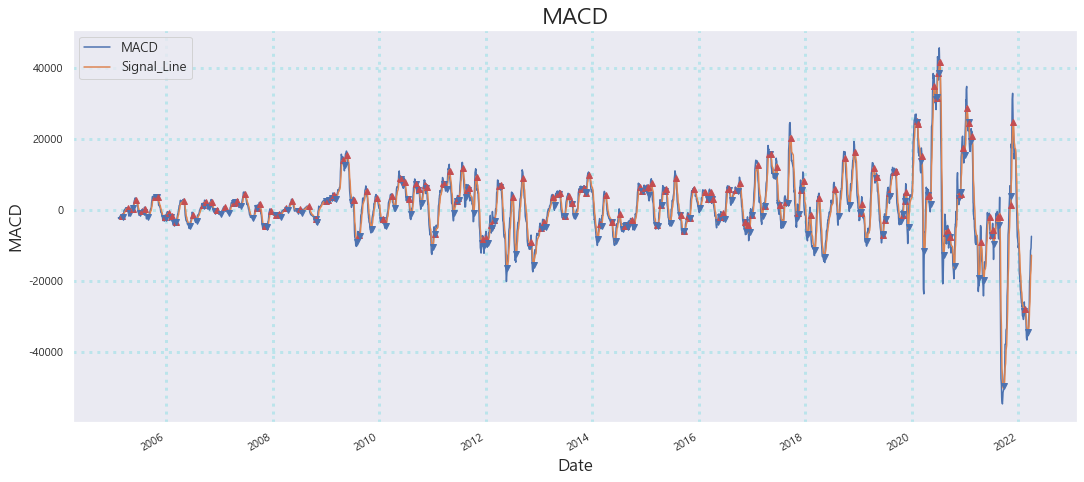

In [284]:
fig, ax1 = plt.subplots(figsize = (25, 5))
엔씨소프트[['MACD','Signal_Line']].plot(figsize = (18,8),ax=ax1)

for i in range(len(df.index)):
    if (엔씨소프트["MACD"].values[i] >= 엔씨소프트["Signal_Line"].values[i]) and (엔씨소프트["MACD"].values[i-1] < 엔씨소프트["Signal_Line"].values[i-1]) :    #콜든크로스(매수)
        print(f"+매수 {pd.to_datetime(엔씨소프트.index.values[i]).strftime('%Y-%m-%d')}  {엔씨소프트['Close'].values[i]:.2f}")
        ax1.plot(df.index.values[i], 엔씨소프트['Signal_Line'].values[i], 'bv')
    elif (엔씨소프트["MACD"].values[i] <= 엔씨소프트["Signal_Line"].values[i]) and (엔씨소프트["MACD"].values[i-1] > 엔씨소프트["Signal_Line"].values[i-1]):  #데드크로스(매도)
        print(f"-매도 {pd.to_datetime(엔씨소프트.index.values[i]).strftime('%Y-%m-%d')}  {엔씨소프트['Close'].values[i]:.2f}")
        ax1.plot(엔씨소프트.index.values[i], 엔씨소프트['Signal_Line'].values[i], 'r^') 
        

ax1.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=3)
ax1.legend( loc='upper left', fontsize = 13)
plt.xlabel('Date', fontsize = 17)
plt.ylabel('MACD', fontsize = 17)
plt.title('MACD', position = (0.5,1.05), fontsize = 23);

In [283]:
#엔씨소프트

locale.setlocale(locale.LC_ALL, 'ko_KR')

# Create a subclass of Strategy to define the indicators and logic
class MACD(bt.Strategy):
    params = (
    # Standard MACD Parameters
    ('macd1', 12),
    ('macd2', 26),
    ('macdsig', 9),
    ('atrperiod', 14),  # ATR Period (standard)
    ('atrdist', 3.0),   # ATR distance for stop price
    ('smaperiod', 30),  # SMA Period (pretty standard)
    ('dirperiod', 10),  # Lookback period to consider SMA trend direction 
    )

    def __init__(self):
        print("---------------",self.data.close[0])#0 
        print("---------------",self.data.open[0])#4
        self.macd = bt.indicators.MACD(self.data,
                                       period_me1=self.p.macd1,
                                       period_me2=self.p.macd2,
                                       period_signal=self.p.macdsig)

        # Cross of macd.macd and macd.signal
        self.mcross = bt.indicators.CrossOver(self.macd.macd, self.macd.signal)
        self.holding = 0
        
    def next(self):
        current_stock_price = self.data.close[0]
       
        if not self.position:  # not in the market
            if self.mcross[0] > 0.0 and self.macd > self.macd.signal:
                available_stocks = self.broker.getcash() / current_stock_price
                self.buy(size=1)
        elif self.mcross[0] < 0.0 and self.macd < self.macd.signal:
            self.sell(size=1)

    
    def notify_order(self, order):
        if order.status not in [order.Completed]:
            return

        if order.isbuy():
            action = 'Buy'
        elif order.issell():
            action = 'Sell'

        stock_price = self.data.close[0]
        cash = self.broker.getcash()
        value = self.broker.getvalue()
        self.holding += order.size

        print('%s[%d] holding[%d] price[%d] cash[%.2f] value[%.2f]'
              % (action, abs(order.size), self.holding, stock_price, cash, value))


cerebro = bt.Cerebro()  # create a "Cerebro" engine instance
cerebro.broker.setcash(1000000)
cerebro.broker.setcommission(0.002)


data = bt.feeds.PandasData(dataname=df)
cerebro.adddata(data)  # Add the data feed

cerebro.addstrategy(MACD)  # Add the trading strategy

start_value = cerebro.broker.getvalue()
cerebro.run()  # run it all
final_value = cerebro.broker.getvalue()

print('* start value : %s won' % locale.format_string('%d', start_value, grouping=True))
print('* final value : %s won' % locale.format_string('%d', final_value, grouping=True))
print('* earning rate : %.2f %%' % ((final_value - start_value) / start_value * 100.0))

# cerebro.plot(style='candlestick',barup='red',bardown='blue',xtight=True,ytight=True, grid=True)

--------------- 467500.0
--------------- 467000.0
Buy[1] holding[1] price[70600] cash[928357.00] value[998957.00]
Sell[1] holding[0] price[74100] cash[1002308.80] value[1002308.80]
Buy[1] holding[1] price[74600] cash[926657.80] value[1001257.80]
Sell[1] holding[0] price[74500] cash[1001907.00] value[1001907.00]
Buy[1] holding[1] price[81800] cash[919642.80] value[1001442.80]
Sell[1] holding[0] price[83500] cash[1003774.20] value[1003774.20]
Buy[1] holding[1] price[80700] cash[921009.00] value[1001709.00]
Sell[1] holding[0] price[76700] cash[997655.40] value[997655.40]
Buy[1] holding[1] price[82600] cash[914990.40] value[997590.40]
Sell[1] holding[0] price[70400] cash[987046.00] value[987046.00]
Buy[1] holding[1] price[71500] cash[914401.00] value[985901.00]
Sell[1] holding[0] price[90700] cash[1001227.00] value[1001227.00]
Buy[1] holding[1] price[94900] cash[904033.00] value[998933.00]
Sell[1] holding[0] price[97500] cash[997845.00] value[997845.00]
Buy[1] holding[1] price[98400] cash[

Buy[1] holding[1] price[323500] cash[728362.60] value[1051862.60]
Sell[1] holding[0] price[289000] cash[1012792.60] value[1012792.60]
Buy[1] holding[1] price[303000] cash[708685.60] value[1011685.60]
Sell[1] holding[0] price[270000] cash[983135.60] value[983135.60]
Buy[1] holding[1] price[282000] cash[695561.60] value[977561.60]
Sell[1] holding[0] price[264000] cash[955041.60] value[955041.60]
Buy[1] holding[1] price[290000] cash[675984.60] value[965984.60]
Sell[1] holding[0] price[265000] cash[945444.60] value[945444.60]
Buy[1] holding[1] price[281000] cash[662379.60] value[943379.60]
Sell[1] holding[0] price[313500] cash[965272.60] value[965272.60]
Buy[1] holding[1] price[322500] cash[643630.60] value[966130.60]
Sell[1] holding[0] price[312000] cash[956004.60] value[956004.60]
Buy[1] holding[1] price[248000] cash[707508.60] value[955508.60]
Sell[1] holding[0] price[243500] cash[960501.60] value[960501.60]
Buy[1] holding[1] price[224000] cash[736053.60] value[960053.60]
Sell[1] holdin

Buy[1] holding[1] price[550000] cash[197920.60] value[747920.60]
Sell[1] holding[0] price[513000] cash[706900.60] value[706900.60]
Buy[1] holding[1] price[452000] cash[256501.60] value[708501.60]
* start value : 1,000,000 won
* final value : 724,001 won
* earning rate : -27.60 %


In [290]:
아모레퍼시픽 = my_MACD(df, period_long = 26, period_short = 12, period_signal = 9)
아모레퍼시픽.tail()

,Open,High,Low,Close,Volume,MACD,Signal_Line,MACD_Hist
날짜,,,,,,,,
2022-03-25,156500,157000,154500,155500,185696,-5295.004370,-3826.368606,-1468.635764
2022-03-28,155000,155000,150000,153000,403054,-5380.392677,-4137.173420,-1243.219257
2022-03-29,154500,160500,153500,159000,623902,-4907.344853,-4291.207707,-616.137147
2022-03-30,161000,162000,157500,160000,262890,-4401.027101,-4313.171586,-87.855516
2022-03-31,157500,160000,157000,160000,245191,-3954.185249,-4241.374318,287.189069


-매도 2006-08-21  40410.00
+매수 2006-08-25  41561.00
-매도 2006-09-04  41111.00
+매수 2006-09-18  42011.00
-매도 2006-11-15  50913.00
+매수 2006-12-05  54014.00
-매도 2006-12-18  53714.00
+매수 2006-12-22  56515.00
-매도 2007-01-03  53814.00
+매수 2007-01-24  55914.00
-매도 2007-02-01  55514.00
+매수 2007-02-14  56615.00
-매도 2007-02-23  55314.00
+매수 2007-03-27  54014.00
-매도 2007-03-28  51913.00
+매수 2007-04-10  51913.00
-매도 2007-05-23  65217.00
+매수 2007-05-29  75019.00
-매도 2007-06-05  69518.00
+매수 2007-07-31  66217.00
-매도 2007-08-01  64717.00
+매수 2007-08-24  59415.00
-매도 2007-10-01  67217.00
+매수 2007-10-11  69918.00
-매도 2007-10-18  66017.00
+매수 2007-10-19  68718.00
-매도 2007-10-22  66717.00
+매수 2007-10-24  69618.00
-매도 2007-11-14  82021.00
+매수 2007-12-27  72119.00
-매도 2008-01-16  65617.00
+매수 2008-02-20  61816.00
-매도 2008-03-12  55414.00
+매수 2008-03-27  53014.00
-매도 2008-05-19  61416.00
+매수 2008-06-10  62616.00
-매도 2008-06-13  61416.00
+매수 2008-06-17  63816.00
-매도 2008-06-30  64817.00
+매수 2008-07-23  59515.00


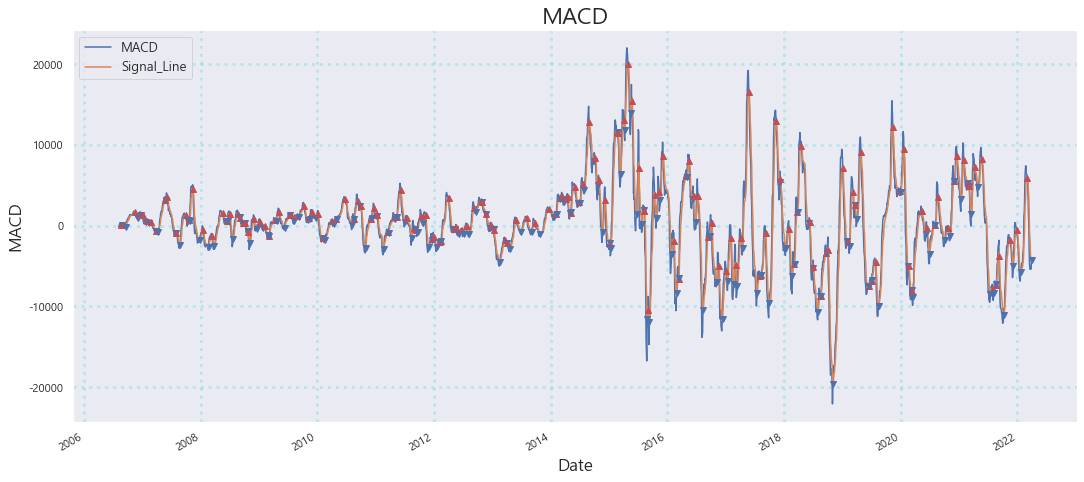

In [291]:
fig, ax1 = plt.subplots(figsize = (25, 5))
아모레퍼시픽[['MACD','Signal_Line']].plot(figsize = (18,8),ax=ax1)

for i in range(len(아모레퍼시픽.index)):
    if (아모레퍼시픽["MACD"].values[i] >= 아모레퍼시픽["Signal_Line"].values[i]) and (아모레퍼시픽["MACD"].values[i-1] < 아모레퍼시픽["Signal_Line"].values[i-1]) :    #콜든크로스(매수)
        print(f"+매수 {pd.to_datetime(아모레퍼시픽.index.values[i]).strftime('%Y-%m-%d')}  {아모레퍼시픽['Close'].values[i]:.2f}")
        ax1.plot(아모레퍼시픽.index.values[i], 아모레퍼시픽['Signal_Line'].values[i], 'bv')
    elif (아모레퍼시픽["MACD"].values[i] <= 아모레퍼시픽["Signal_Line"].values[i]) and (아모레퍼시픽["MACD"].values[i-1] > 아모레퍼시픽["Signal_Line"].values[i-1]):  #데드크로스(매도)
        print(f"-매도 {pd.to_datetime(아모레퍼시픽.index.values[i]).strftime('%Y-%m-%d')}  {아모레퍼시픽['Close'].values[i]:.2f}")
        ax1.plot(아모레퍼시픽.index.values[i], 아모레퍼시픽['Signal_Line'].values[i], 'r^') 
        

ax1.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=3)
ax1.legend( loc='upper left', fontsize = 13)
plt.xlabel('Date', fontsize = 17)
plt.ylabel('MACD', fontsize = 17)
plt.title('MACD', position = (0.5,1.05), fontsize = 23);

In [295]:
#아모레퍼시픽

locale.setlocale(locale.LC_ALL, 'ko_KR')

# Create a subclass of Strategy to define the indicators and logic
class MACD(bt.Strategy):
    params = (
    # Standard MACD Parameters
    ('macd1', 12),
    ('macd2', 26),
    ('macdsig', 9),
    ('atrperiod', 14),  # ATR Period (standard)
    ('atrdist', 3.0),   # ATR distance for stop price
    ('smaperiod', 30),  # SMA Period (pretty standard)
    ('dirperiod', 10),  # Lookback period to consider SMA trend direction 
    )

    def __init__(self):
        print("---------------",self.data.close[0])#0 
        print("---------------",self.data.open[0])#4
        self.macd = bt.indicators.MACD(self.data,
                                       period_me1=self.p.macd1,
                                       period_me2=self.p.macd2,
                                       period_signal=self.p.macdsig)

        # Cross of macd.macd and macd.signal
        self.mcross = bt.indicators.CrossOver(self.macd.macd, self.macd.signal)
        self.holding = 0
        
    def next(self):
        current_stock_price = self.data.close[0]
       
        if not self.position:  # not in the market
            if self.mcross[0] > 0.0 and self.macd > self.macd.signal:
                available_stocks = self.broker.getcash() / current_stock_price
                self.buy(size=1)
        elif self.mcross[0] < 0.0 and self.macd < self.macd.signal:
            self.sell(size=1)

    
    def notify_order(self, order):
        if order.status not in [order.Completed]:
            return

        if order.isbuy():
            action = 'Buy'
        elif order.issell():
            action = 'Sell'

        stock_price = self.data.close[0]
        cash = self.broker.getcash()
        value = self.broker.getvalue()
        self.holding += order.size

        print('%s[%d] holding[%d] price[%d] cash[%.2f] value[%.2f]'
              % (action, abs(order.size), self.holding, stock_price, cash, value))


cerebro = bt.Cerebro()  # create a "Cerebro" engine instance
cerebro.broker.setcash(1000000)
cerebro.broker.setcommission(0.002)


data = bt.feeds.PandasData(dataname=df)
cerebro.adddata(data)  # Add the data feed

cerebro.addstrategy(MACD)  # Add the trading strategy

start_value = cerebro.broker.getvalue()
cerebro.run()  # run it all
final_value = cerebro.broker.getvalue()

print('* start value : %s won' % locale.format_string('%d', start_value, grouping=True))
print('* final value : %s won' % locale.format_string('%d', final_value, grouping=True))
print('* earning rate : %.2f %%' % ((final_value - start_value) / start_value * 100.0))

# cerebro.plot(style='candlestick',barup='red',bardown='blue',xtight=True,ytight=True, grid=True)

--------------- 160000.0
--------------- 157500.0
Buy[1] holding[1] price[42011] cash[958406.98] value[1000417.98]
Sell[1] holding[0] price[50613] cash[1008818.95] value[1008818.95]
Buy[1] holding[1] price[56915] cash[954597.73] value[1011512.73]
Sell[1] holding[0] price[53714] cash[1008003.70] value[1008003.70]
Buy[1] holding[1] price[56314] cash[952478.87] value[1008792.87]
Sell[1] holding[0] price[52514] cash[1007782.05] value[1007782.05]
Buy[1] holding[1] price[56214] cash[951756.22] value[1007970.22]
Sell[1] holding[0] price[55214] cash[1006859.79] value[1006859.79]
Buy[1] holding[1] price[57715] cash[949631.56] value[1007346.56]
Sell[1] holding[0] price[55414] cash[1004335.93] value[1004335.93]
Buy[1] holding[1] price[51913] cash[950515.51] value[1002428.51]
Sell[1] holding[0] price[51813] cash[1002324.68] value[1002324.68]
Buy[1] holding[1] price[52514] cash[949406.06] value[1001920.06]
Sell[1] holding[0] price[66817] cash[1014391.82] value[1014391.82]
Buy[1] holding[1] price[75

Sell[1] holding[0] price[98225] cash[919593.27] value[919593.27]
Buy[1] holding[1] price[103927] cash[815359.22] value[919286.22]
Sell[1] holding[0] price[102426] cash[915982.57] value[915982.57]
Buy[1] holding[1] price[113329] cash[809543.12] value[922872.12]
Sell[1] holding[0] price[111729] cash[922046.66] value[922046.66]
Buy[1] holding[1] price[117830] cash[803580.20] value[921410.20]
Sell[1] holding[0] price[116430] cash[923370.14] value[923370.14]
Buy[1] holding[1] price[123532] cash[798088.07] value[921620.07]
Sell[1] holding[0] price[127533] cash[924866.01] value[924866.01]
Buy[1] holding[1] price[134335] cash[793671.14] value[928006.14]
Sell[1] holding[0] price[125832] cash[923344.28] value[923344.28]
Buy[1] holding[1] price[129633] cash[787138.41] value[916771.41]
Sell[1] holding[0] price[141036] cash[921902.34] value[921902.34]
Buy[1] holding[1] price[143737] cash[780584.27] value[924321.27]
Sell[1] holding[0] price[145237] cash[925431.00] value[925431.00]
Buy[1] holding[1] 

In [299]:
케이티앤지 = my_MACD(df, period_long = 26, period_short = 12, period_signal = 9)
케이티앤지.tail()

,Open,High,Low,Close,Volume,MACD,Signal_Line,MACD_Hist
날짜,,,,,,,,
2022-03-25,80400,80800,80400,80800,217292,241.034146,290.903090,-49.868944
2022-03-28,80200,80900,80100,80800,170834,224.542460,277.630964,-53.088504
2022-03-29,81000,81100,80500,81100,157378,232.994358,268.703643,-35.709284
2022-03-30,81300,81300,80600,80900,204322,221.006594,259.164233,-38.157639
2022-03-31,81000,81200,80600,80700,250995,193.141461,245.959679,-52.818217


+매수 2005-03-14  32500.00
-매도 2005-03-16  31200.00
+매수 2005-03-18  32600.00
-매도 2005-04-18  33900.00
+매수 2005-04-29  36000.00
-매도 2005-05-12  36350.00
+매수 2005-06-08  36400.00
-매도 2005-07-11  41100.00
+매수 2005-07-25  42850.00
-매도 2005-08-01  40950.00
+매수 2005-08-16  42500.00
-매도 2005-09-09  46050.00
+매수 2005-10-26  43100.00
-매도 2005-11-29  45000.00
+매수 2005-12-01  47450.00
-매도 2005-12-05  46750.00
+매수 2005-12-21  46900.00
-매도 2005-12-29  45050.00
+매수 2006-01-13  47500.00
-매도 2006-01-26  45550.00
+매수 2006-02-01  48400.00
-매도 2006-02-22  53000.00
+매수 2006-03-02  58900.00
-매도 2006-03-06  56500.00
+매수 2006-04-10  56400.00
-매도 2006-04-11  55600.00
+매수 2006-05-09  55000.00
-매도 2006-05-16  51500.00
+매수 2006-05-25  53100.00
-매도 2006-06-08  50200.00
+매수 2006-06-27  52100.00
-매도 2006-07-27  57700.00
+매수 2006-08-10  60900.00
-매도 2006-08-18  57900.00
+매수 2006-09-15  57800.00
-매도 2006-09-29  57500.00
+매수 2006-10-02  57900.00
-매도 2006-10-04  57000.00
+매수 2006-10-23  57100.00
-매도 2006-11-13  56800.00


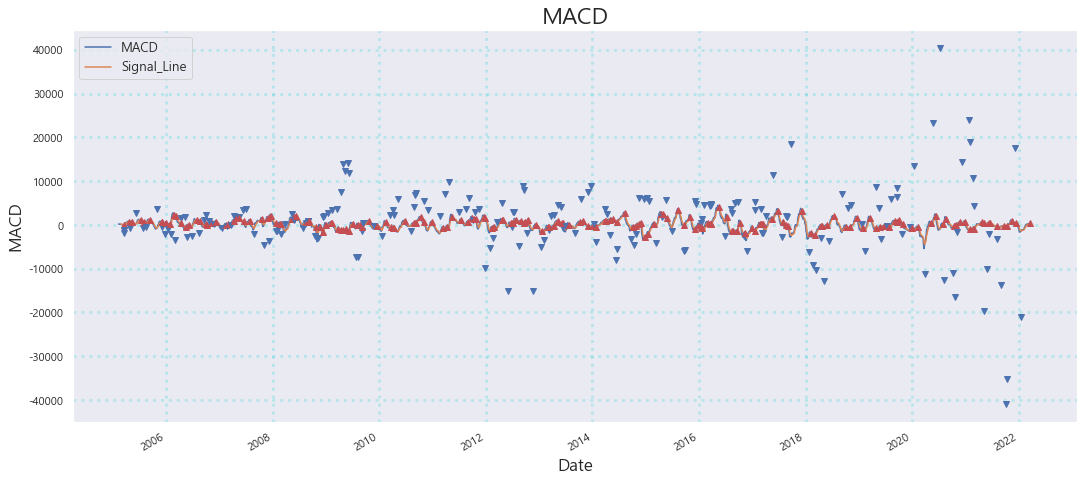

In [300]:
fig, ax1 = plt.subplots(figsize = (25, 5))
케이티앤지[['MACD','Signal_Line']].plot(figsize = (18,8),ax=ax1)

for i in range(len(케이티앤지.index)):
    if (케이티앤지["MACD"].values[i] >= 케이티앤지["Signal_Line"].values[i]) and (케이티앤지["MACD"].values[i-1] < 케이티앤지["Signal_Line"].values[i-1]) :    #콜든크로스(매수)
        print(f"+매수 {pd.to_datetime(케이티앤지.index.values[i]).strftime('%Y-%m-%d')}  {케이티앤지['Close'].values[i]:.2f}")
        ax1.plot(케이티앤지.index.values[i], 엔씨소프트['Signal_Line'].values[i], 'bv')
    elif (케이티앤지["MACD"].values[i] <= 케이티앤지["Signal_Line"].values[i]) and (케이티앤지["MACD"].values[i-1] > 케이티앤지["Signal_Line"].values[i-1]):  #데드크로스(매도)
        print(f"-매도 {pd.to_datetime(케이티앤지.index.values[i]).strftime('%Y-%m-%d')}  {케이티앤지['Close'].values[i]:.2f}")
        ax1.plot(케이티앤지.index.values[i], 케이티앤지['Signal_Line'].values[i], 'r^') 
        

ax1.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=3)
ax1.legend( loc='upper left', fontsize = 13)
plt.xlabel('Date', fontsize = 17)
plt.ylabel('MACD', fontsize = 17)
plt.title('MACD', position = (0.5,1.05), fontsize = 23);

In [303]:
#케이티앤지

locale.setlocale(locale.LC_ALL, 'ko_KR')

# Create a subclass of Strategy to define the indicators and logic
class MACD(bt.Strategy):
    params = (
    # Standard MACD Parameters
    ('macd1', 12),
    ('macd2', 26),
    ('macdsig', 9),
    ('atrperiod', 14),  # ATR Period (standard)
    ('atrdist', 3.0),   # ATR distance for stop price
    ('smaperiod', 30),  # SMA Period (pretty standard)
    ('dirperiod', 10),  # Lookback period to consider SMA trend direction 
    )

    def __init__(self):
        print("---------------",self.data.close[0])#0 
        print("---------------",self.data.open[0])#4
        self.macd = bt.indicators.MACD(self.data,
                                       period_me1=self.p.macd1,
                                       period_me2=self.p.macd2,
                                       period_signal=self.p.macdsig)

        # Cross of macd.macd and macd.signal
        self.mcross = bt.indicators.CrossOver(self.macd.macd, self.macd.signal)
        self.holding = 0
        
    def next(self):
        current_stock_price = self.data.close[0]
       
        if not self.position:  # not in the market
            if self.mcross[0] > 0.0 and self.macd > self.macd.signal:
                available_stocks = self.broker.getcash() / current_stock_price
                self.buy(size=1)
        elif self.mcross[0] < 0.0 and self.macd < self.macd.signal:
            self.sell(size=1)

    
    def notify_order(self, order):
        if order.status not in [order.Completed]:
            return

        if order.isbuy():
            action = 'Buy'
        elif order.issell():
            action = 'Sell'

        stock_price = self.data.close[0]
        cash = self.broker.getcash()
        value = self.broker.getvalue()
        self.holding += order.size

        print('%s[%d] holding[%d] price[%d] cash[%.2f] value[%.2f]'
              % (action, abs(order.size), self.holding, stock_price, cash, value))


cerebro = bt.Cerebro()  # create a "Cerebro" engine instance
cerebro.broker.setcash(1000000)
cerebro.broker.setcommission(0.002)


data = bt.feeds.PandasData(dataname=df)
cerebro.adddata(data)  # Add the data feed

cerebro.addstrategy(MACD)  # Add the trading strategy

start_value = cerebro.broker.getvalue()
cerebro.run()  # run it all
final_value = cerebro.broker.getvalue()

print('* start value : %s won' % locale.format_string('%d', start_value, grouping=True))
print('* final value : %s won' % locale.format_string('%d', final_value, grouping=True))
print('* earning rate : %.2f %%' % ((final_value - start_value) / start_value * 100.0))

# cerebro.plot(style='candlestick',barup='red',bardown='blue',xtight=True,ytight=True, grid=True)

--------------- 80700.0
--------------- 81000.0
Buy[1] holding[1] price[31350] cash[967435.00] value[998785.00]
Sell[1] holding[0] price[30500] cash[998373.00] value[998373.00]
Buy[1] holding[1] price[33700] cash[965307.00] value[999007.00]
Sell[1] holding[0] price[34000] cash[999937.60] value[999937.60]
Buy[1] holding[1] price[36400] cash[963364.60] value[999764.60]
Sell[1] holding[0] price[35800] cash[999641.90] value[999641.90]
Buy[1] holding[1] price[37250] cash[963169.10] value[1000419.10]
Sell[1] holding[0] price[39800] cash[1003588.10] value[1003588.10]
Buy[1] holding[1] price[42800] cash[960502.10] value[1003302.10]
Sell[1] holding[0] price[41550] cash[1001719.50] value[1001719.50]
Buy[1] holding[1] price[42700] cash[959184.60] value[1001884.60]
Sell[1] holding[0] price[45800] cash[1005142.50] value[1005142.50]
Buy[1] holding[1] price[42500] cash[962006.40] value[1004506.40]
Sell[1] holding[0] price[45900] cash[1007215.80] value[1007215.80]
Buy[1] holding[1] price[47050] cash[9

Sell[1] holding[0] price[112500] cash[903218.30] value[903218.30]
Buy[1] holding[1] price[108000] cash[794000.30] value[902000.30]
Sell[1] holding[0] price[105500] cash[899788.30] value[899788.30]
Buy[1] holding[1] price[108000] cash[792073.30] value[900073.30]
Sell[1] holding[0] price[105000] cash[895865.30] value[895865.30]
Buy[1] holding[1] price[107000] cash[787649.30] value[894649.30]
Sell[1] holding[0] price[105000] cash[894934.30] value[894934.30]
Buy[1] holding[1] price[106000] cash[787219.30] value[893219.30]
Sell[1] holding[0] price[97000] cash[885622.10] value[885622.10]
Buy[1] holding[1] price[106500] cash[780913.10] value[887413.10]
Sell[1] holding[0] price[105500] cash[886202.10] value[886202.10]
Buy[1] holding[1] price[107000] cash[778988.10] value[885988.10]
Sell[1] holding[0] price[108500] cash[886273.10] value[886273.10]
Buy[1] holding[1] price[107500] cash[777556.10] value[885056.10]
Sell[1] holding[0] price[108500] cash[884342.10] value[884342.10]
Buy[1] holding[1] 

In [306]:
SK하이닉스 = my_MACD(df, period_long = 26, period_short = 12, period_signal = 9)
SK하이닉스.tail()

,Open,High,Low,Close,Volume,MACD,Signal_Line,MACD_Hist
날짜,,,,,,,,
2022-03-25,122000,123000,118000,118000,5514940,-1142.176257,-1246.290766,104.114509
2022-03-28,117500,119500,116500,118000,3234792,-1295.827473,-1256.198107,-39.629366
2022-03-29,119500,120500,118500,120000,3375247,-1241.898055,-1253.338097,11.440041
2022-03-30,123000,123000,120500,121000,3436282,-1105.720898,-1223.814657,118.093759
2022-03-31,119500,120000,117500,118000,4558063,-1225.744825,-1224.200691,-1.544135


-매도 2005-02-28  15050.00
+매수 2005-04-01  13650.00
-매도 2005-04-18  12400.00
+매수 2005-05-06  13200.00
-매도 2005-06-13  15650.00
+매수 2005-06-17  17400.00
-매도 2005-06-27  16550.00
+매수 2005-07-06  18100.00
-매도 2005-07-22  20550.00
+매수 2005-07-25  22700.00
-매도 2005-08-05  22100.00
+매수 2005-09-02  22900.00
-매도 2005-09-09  21500.00
+매수 2005-09-12  22800.00
-매도 2005-09-30  23000.00
+매수 2005-11-07  22000.00
-매도 2005-11-24  21400.00
+매수 2005-12-02  23600.00
-매도 2006-01-13  38100.00
+매수 2006-02-28  33250.00
-매도 2006-03-03  30500.00
+매수 2006-03-29  27650.00
-매도 2006-05-02  31100.00
+매수 2006-05-17  34300.00
-매도 2006-05-23  32900.00
+매수 2006-06-28  29750.00
-매도 2006-08-11  32550.00
+매수 2006-08-17  34400.00
-매도 2006-09-11  36700.00
+매수 2006-09-13  38350.00
-매도 2006-09-21  38150.00
+매수 2006-11-13  35100.00
-매도 2006-12-12  34600.00
+매수 2006-12-15  36250.00
-매도 2007-01-11  36200.00
+매수 2007-02-15  31300.00
-매도 2007-03-20  31350.00
+매수 2007-03-21  31900.00
-매도 2007-04-19  32200.00
+매수 2007-05-08  32700.00


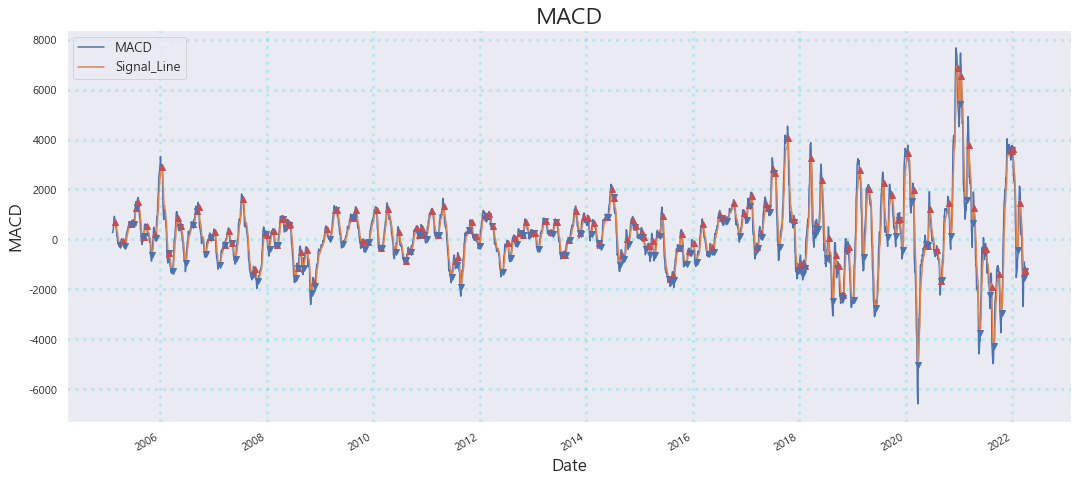

In [307]:
fig, ax1 = plt.subplots(figsize = (25, 5))
SK하이닉스[['MACD','Signal_Line']].plot(figsize = (18,8),ax=ax1)

for i in range(len(SK하이닉스.index)):
    if (SK하이닉스["MACD"].values[i] >= SK하이닉스["Signal_Line"].values[i]) and (SK하이닉스["MACD"].values[i-1] < SK하이닉스["Signal_Line"].values[i-1]) :    #콜든크로스(매수)
        print(f"+매수 {pd.to_datetime(SK하이닉스.index.values[i]).strftime('%Y-%m-%d')}  {SK하이닉스['Close'].values[i]:.2f}")
        ax1.plot(df.index.values[i], SK하이닉스['Signal_Line'].values[i], 'bv')
    elif (SK하이닉스["MACD"].values[i] <= SK하이닉스["Signal_Line"].values[i]) and (SK하이닉스["MACD"].values[i-1] > SK하이닉스["Signal_Line"].values[i-1]):  #데드크로스(매도)
        print(f"-매도 {pd.to_datetime(SK하이닉스.index.values[i]).strftime('%Y-%m-%d')}  {SK하이닉스['Close'].values[i]:.2f}")
        ax1.plot(SK하이닉스.index.values[i], SK하이닉스['Signal_Line'].values[i], 'r^') 
        

ax1.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=3)
ax1.legend( loc='upper left', fontsize = 13)
plt.xlabel('Date', fontsize = 17)
plt.ylabel('MACD', fontsize = 17)
plt.title('MACD', position = (0.5,1.05), fontsize = 23);

In [308]:
#SK하이닉스

locale.setlocale(locale.LC_ALL, 'ko_KR')

# Create a subclass of Strategy to define the indicators and logic
class MACD(bt.Strategy):
    params = (
    # Standard MACD Parameters
    ('macd1', 12),
    ('macd2', 26),
    ('macdsig', 9),
    ('atrperiod', 14),  # ATR Period (standard)
    ('atrdist', 3.0),   # ATR distance for stop price
    ('smaperiod', 30),  # SMA Period (pretty standard)
    ('dirperiod', 10),  # Lookback period to consider SMA trend direction 
    )

    def __init__(self):
        print("---------------",self.data.close[0])#0 
        print("---------------",self.data.open[0])#4
        self.macd = bt.indicators.MACD(self.data,
                                       period_me1=self.p.macd1,
                                       period_me2=self.p.macd2,
                                       period_signal=self.p.macdsig)

        # Cross of macd.macd and macd.signal
        self.mcross = bt.indicators.CrossOver(self.macd.macd, self.macd.signal)
        self.holding = 0
        
    def next(self):
        current_stock_price = self.data.close[0]
       
        if not self.position:  # not in the market
            if self.mcross[0] > 0.0 and self.macd > self.macd.signal:
                available_stocks = self.broker.getcash() / current_stock_price
                self.buy(size=1)
        elif self.mcross[0] < 0.0 and self.macd < self.macd.signal:
            self.sell(size=1)

    
    def notify_order(self, order):
        if order.status not in [order.Completed]:
            return

        if order.isbuy():
            action = 'Buy'
        elif order.issell():
            action = 'Sell'

        stock_price = self.data.close[0]
        cash = self.broker.getcash()
        value = self.broker.getvalue()
        self.holding += order.size

        print('%s[%d] holding[%d] price[%d] cash[%.2f] value[%.2f]'
              % (action, abs(order.size), self.holding, stock_price, cash, value))


cerebro = bt.Cerebro()  # create a "Cerebro" engine instance
cerebro.broker.setcash(1000000)
cerebro.broker.setcommission(0.002)


data = bt.feeds.PandasData(dataname=df)
cerebro.adddata(data)  # Add the data feed

cerebro.addstrategy(MACD)  # Add the trading strategy

start_value = cerebro.broker.getvalue()
cerebro.run()  # run it all
final_value = cerebro.broker.getvalue()

print('* start value : %s won' % locale.format_string('%d', start_value, grouping=True))
print('* final value : %s won' % locale.format_string('%d', final_value, grouping=True))
print('* earning rate : %.2f %%' % ((final_value - start_value) / start_value * 100.0))

# cerebro.plot(style='candlestick',barup='red',bardown='blue',xtight=True,ytight=True, grid=True)

--------------- 118000.0
--------------- 119500.0
Buy[1] holding[1] price[13900] cash[986222.50] value[1000122.50]
Sell[1] holding[0] price[12600] cash[998847.20] value[998847.20]
Buy[1] holding[1] price[13700] cash[985520.60] value[999220.60]
Sell[1] holding[0] price[15700] cash[1000989.60] value[1000989.60]
Buy[1] holding[1] price[17400] cash[983254.20] value[1000654.20]
Sell[1] holding[0] price[16400] cash[999322.00] value[999322.00]
Buy[1] holding[1] price[18150] cash[981336.10] value[999486.10]
Sell[1] holding[0] price[22700] cash[1001845.00] value[1001845.00]
Buy[1] holding[1] price[22650] cash[979099.60] value[1001749.60]
Sell[1] holding[0] price[22500] cash[1000656.40] value[1000656.40]
Buy[1] holding[1] price[23000] cash[977259.70] value[1000259.70]
Sell[1] holding[0] price[22800] cash[998816.50] value[998816.50]
Buy[1] holding[1] price[22750] cash[975970.90] value[998720.90]
Sell[1] holding[0] price[22500] cash[999024.70] value[999024.70]
Buy[1] holding[1] price[21700] cash[9

Sell[1] holding[0] price[22050] cash[1014712.16] value[1014712.16]
Buy[1] holding[1] price[23650] cash[990964.76] value[1014614.76]
Sell[1] holding[0] price[25400] cash[1016912.76] value[1016912.76]
Buy[1] holding[1] price[28700] cash[988055.16] value[1016755.16]
Sell[1] holding[0] price[29850] cash[1017795.56] value[1017795.56]
Buy[1] holding[1] price[30200] cash[987384.86] value[1017584.86]
Sell[1] holding[0] price[29750] cash[1016726.06] value[1016726.06]
Buy[1] holding[1] price[30500] cash[986315.36] value[1016815.36]
Sell[1] holding[0] price[29350] cash[1015407.06] value[1015407.06]
Buy[1] holding[1] price[21750] cash[992912.16] value[1014662.16]
Sell[1] holding[0] price[22400] cash[1015117.66] value[1015117.66]
Buy[1] holding[1] price[21500] cash[993173.86] value[1014673.86]
Sell[1] holding[0] price[21300] cash[1014830.46] value[1014830.46]
Buy[1] holding[1] price[21950] cash[992636.16] value[1014586.16]
Sell[1] holding[0] price[23150] cash[1015440.46] value[1015440.46]
Buy[1] ho

Buy[1] holding[1] price[83300] cash[911051.76] value[994351.76]
Sell[1] holding[0] price[85400] cash[994284.96] value[994284.96]
Buy[1] holding[1] price[82800] cash[911018.76] value[993818.76]
Sell[1] holding[0] price[80700] cash[992056.36] value[992056.36]
Buy[1] holding[1] price[77800] cash[912397.36] value[990197.36]
Sell[1] holding[0] price[75500] cash[988145.56] value[988145.56]
Buy[1] holding[1] price[78700] cash[911592.76] value[990292.76]
Sell[1] holding[0] price[83300] cash[995624.36] value[995624.36]
Buy[1] holding[1] price[86000] cash[908951.36] value[994951.36]
Sell[1] holding[0] price[112500] cash[1023721.36] value[1023721.36]
Buy[1] holding[1] price[131000] cash[890956.36] value[1021956.36]
Sell[1] holding[0] price[130000] cash[1016704.36] value[1016704.36]
Buy[1] holding[1] price[138500] cash[882937.36] value[1021437.36]
Sell[1] holding[0] price[133000] cash[1023156.36] value[1023156.36]
Buy[1] holding[1] price[143000] cash[875862.36] value[1018862.36]
Sell[1] holding[0]

In [134]:
LG유플러스 = my_MACD(df, period_long = 26, period_short = 12, period_signal = 9)
LG유플러스.tail()

,Open,High,Low,Close,Volume,MACD,Signal_Line,MACD_Hist
날짜,,,,,,,,
2022-03-25,14000,14100,13900,14000,983966,143.172355,85.058380,58.113974
2022-03-28,13950,14000,13800,13950,837491,151.876466,98.421998,53.454469
2022-03-29,14000,14000,13850,13900,596318,152.976537,109.332906,43.643632
2022-03-30,13900,14000,13700,13800,634928,144.117886,116.289902,27.827984
2022-03-31,13800,14100,13750,14000,794373,151.489394,123.329800,28.159594


In [171]:
#lg유플러스

locale.setlocale(locale.LC_ALL, 'ko_KR')

# Create a subclass of Strategy to define the indicators and logic
class MACD(bt.Strategy):
    params = (
    # Standard MACD Parameters
    ('macd1', 12),
    ('macd2', 26),
    ('macdsig', 9),
    ('atrperiod', 14),  # ATR Period (standard)
    ('atrdist', 3.0),   # ATR distance for stop price
    ('smaperiod', 30),  # SMA Period (pretty standard)
    ('dirperiod', 10),  # Lookback period to consider SMA trend direction 
    )

    def __init__(self):
        print("---------------",self.data.close[0])#0 
        print("---------------",self.data.open[0])#4
        self.macd = bt.indicators.MACD(self.data,
                                       period_me1=self.p.macd1,
                                       period_me2=self.p.macd2,
                                       period_signal=self.p.macdsig)

        # Cross of macd.macd and macd.signal
        self.mcross = bt.indicators.CrossOver(self.macd.macd, self.macd.signal)
        self.holding = 0
        
    def next(self):
        current_stock_price = self.data.close[0]
       
        if not self.position:  # not in the market
            if self.mcross[0] > 0.0 and self.macd > self.macd.signal:
                available_stocks = self.broker.getcash() / current_stock_price
                self.buy(size=1)
        elif self.mcross[0] < 0.0 and self.macd < self.macd.signal:
            self.sell(size=1)

    
    def notify_order(self, order):
        if order.status not in [order.Completed]:
            return

        if order.isbuy():
            action = 'Buy'
        elif order.issell():
            action = 'Sell'

        stock_price = self.data.close[0]
        cash = self.broker.getcash()
        value = self.broker.getvalue()
        self.holding += order.size

        print('%s[%d] holding[%d] price[%d] cash[%.2f] value[%.2f]'
              % (action, abs(order.size), self.holding, stock_price, cash, value))


cerebro = bt.Cerebro()  # create a "Cerebro" engine instance
cerebro.broker.setcash(100000)
cerebro.broker.setcommission(0.002)


data = bt.feeds.PandasData(dataname=df)
cerebro.adddata(data)  # Add the data feed

cerebro.addstrategy(MACD)  # Add the trading strategy

start_value = cerebro.broker.getvalue()
cerebro.run()  # run it all
final_value = cerebro.broker.getvalue()

print('* start value : %s won' % locale.format_string('%d', start_value, grouping=True))
print('* final value : %s won' % locale.format_string('%d', final_value, grouping=True))
print('* earning rate : %.2f %%' % ((final_value - start_value) / start_value * 100.0))

# cerebro.plot(style='candlestick',barup='red',bardown='blue',xtight=True,ytight=True, grid=True)

--------------- 14000.0
--------------- 13800.0
Buy[1] holding[1] price[3880] cash[96032.08] value[99912.08]
Sell[1] holding[0] price[3890] cash[99934.26] value[99934.26]
Buy[1] holding[1] price[3945] cash[95966.34] value[99911.34]
Sell[1] holding[0] price[3715] cash[99723.81] value[99723.81]
Buy[1] holding[1] price[3870] cash[95876.13] value[99746.13]
Sell[1] holding[0] price[5150] cash[100586.69] value[100586.69]
Buy[1] holding[1] price[5050] cash[95316.17] value[100366.17]
Sell[1] holding[0] price[4670] cash[100101.58] value[100101.58]
Buy[1] holding[1] price[5630] cash[94590.58] value[100220.58]
Sell[1] holding[0] price[5100] cash[99740.26] value[99740.26]
Buy[1] holding[1] price[6200] cash[93527.86] value[99727.86]
Sell[1] holding[0] price[5710] cash[99336.22] value[99336.22]
Buy[1] holding[1] price[5470] cash[93915.40] value[99385.40]
Sell[1] holding[0] price[6380] cash[100212.78] value[100212.78]
Buy[1] holding[1] price[6900] cash[93298.98] value[100198.98]
Sell[1] holding[0] pr

Sell[1] holding[0] price[15650] cash[95546.95] value[95546.95]
Buy[1] holding[1] price[14950] cash[80416.75] value[95366.75]
Sell[1] holding[0] price[14600] cash[95037.45] value[95037.45]
Buy[1] holding[1] price[14450] cash[80257.95] value[94707.95]
Sell[1] holding[0] price[14400] cash[94828.75] value[94828.75]
Buy[1] holding[1] price[14350] cash[80349.85] value[94699.85]
Sell[1] holding[0] price[14250] cash[94571.35] value[94571.35]
Buy[1] holding[1] price[14950] cash[79491.25] value[94441.25]
Sell[1] holding[0] price[14700] cash[94161.85] value[94161.85]
Buy[1] holding[1] price[13900] cash[80234.05] value[94134.05]
Sell[1] holding[0] price[13600] cash[93806.85] value[93806.85]
Buy[1] holding[1] price[13650] cash[80380.05] value[94030.05]
Sell[1] holding[0] price[13150] cash[93553.65] value[93553.65]
Buy[1] holding[1] price[13350] cash[80227.05] value[93577.05]
* start value : 100,000 won
* final value : 94,227 won
* earning rate : -5.77 %


In [136]:
삼성물산 = my_MACD(df, period_long = 26, period_short = 12, period_signal = 9)
삼성물산.tail()

,Open,High,Low,Close,Volume,MACD,Signal_Line,MACD_Hist
날짜,,,,,,,,
2022-03-25,112500,113000,111000,112000,167927,759.097397,857.236716,-98.139318
2022-03-28,111500,112500,111000,111000,212452,538.206762,793.430725,-255.223963
2022-03-29,112000,113000,111000,112500,173274,478.669007,730.478382,-251.809374
2022-03-30,113500,113500,112500,113000,160538,466.453741,677.673453,-211.219713
2022-03-31,112500,114500,112500,114000,233563,531.339743,648.406711,-117.066968


In [224]:
미래에셋증권 = my_MACD(df, period_long = 26, period_short = 12, period_signal = 9)
미래에셋증권.tail()

,Open,High,Low,Close,Volume,MACD,Signal_Line,MACD_Hist
날짜,,,,,,,,
2022-03-25,8370,8400,8280,8390,673187,-98.426519,-111.537800,13.111281
2022-03-28,8310,8460,8300,8450,625160,-84.276807,-106.085601,21.808794
2022-03-29,8460,8550,8460,8540,860706,-65.050944,-97.878670,32.827726
2022-03-30,8570,8630,8490,8520,698085,-50.842067,-88.471349,37.629283
2022-03-31,8500,8600,8500,8560,646505,-35.939475,-77.964974,42.025499


-매도 2005-02-23  5280.00
+매수 2005-02-24  5527.00
-매도 2005-03-16  6668.00
+매수 2005-04-08  6447.00
-매도 2005-04-15  5855.00
+매수 2005-05-10  4953.00
-매도 2005-07-06  7711.00
+매수 2005-07-14  8384.00
-매도 2005-08-02  9241.00
+매수 2005-08-17  10347.00
-매도 2005-08-18  9728.00
+매수 2005-08-23  10568.00
-매도 2005-08-25  10391.00
+매수 2005-09-09  10657.00
-매도 2005-09-30  11364.00
+매수 2005-11-02  10745.00
-매도 2005-12-16  15034.00
+매수 2006-01-02  16936.00
-매도 2006-01-11  16759.00
+매수 2006-01-13  17776.00
-매도 2006-01-17  16715.00
+매수 2006-02-17  14106.00
-매도 2006-03-06  13885.00
+매수 2006-03-17  14106.00
-매도 2006-03-24  13531.00
+매수 2006-04-03  14504.00
-매도 2006-04-25  15122.00
+매수 2006-04-27  15830.00
-매도 2006-04-28  15122.00
+매수 2006-05-09  15963.00
-매도 2006-05-15  14945.00
+매수 2006-06-16  12514.00
-매도 2006-07-14  11453.00
+매수 2006-07-27  12115.00
-매도 2006-09-06  14239.00
+매수 2006-10-19  14415.00
-매도 2006-11-17  15609.00
+매수 2006-12-01  16582.00
-매도 2006-12-08  15609.00
+매수 2006-12-19  16228.00
-매도 2006-1

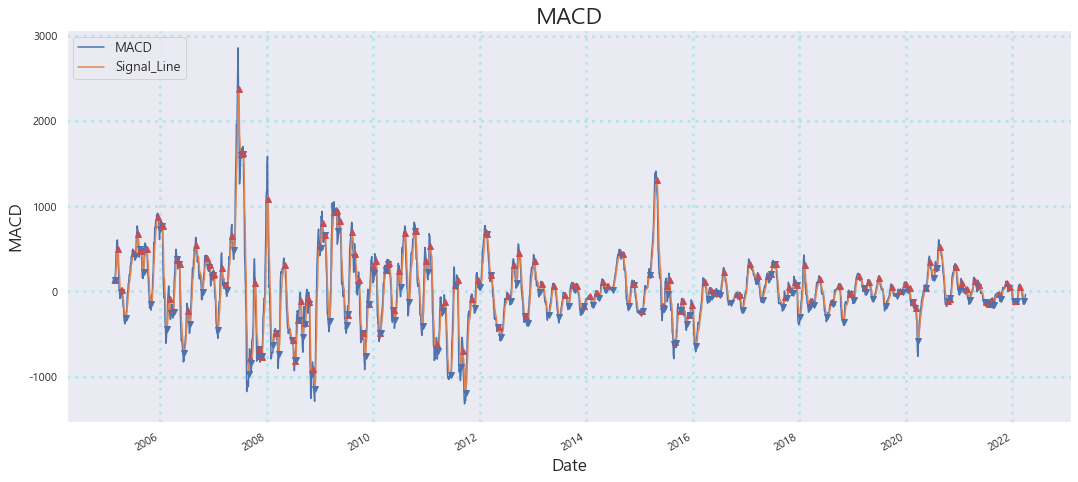

In [225]:
fig, ax1 = plt.subplots(figsize = (25, 5))
미래에셋증권[['MACD','Signal_Line']].plot(figsize = (18,8),ax=ax1)

for i in range(len(미래에셋증권.index)):
    if (미래에셋증권["MACD"].values[i] >=미래에셋증권["Signal_Line"].values[i]) and (미래에셋증권["MACD"].values[i-1] < 미래에셋증권["Signal_Line"].values[i-1]) :    #콜든크로스(매수)
        print(f"+매수 {pd.to_datetime(미래에셋증권.index.values[i]).strftime('%Y-%m-%d')}  {미래에셋증권['Close'].values[i]:.2f}")
        ax1.plot(미래에셋증권.index.values[i], 미래에셋증권['Signal_Line'].values[i], 'bv')
    elif (미래에셋증권["MACD"].values[i] <= 미래에셋증권["Signal_Line"].values[i]) and (미래에셋증권["MACD"].values[i-1] > 미래에셋증권["Signal_Line"].values[i-1]):  #데드크로스(매도)
        print(f"-매도 {pd.to_datetime(미래에셋증권.index.values[i]).strftime('%Y-%m-%d')}  {미래에셋증권['Close'].values[i]:.2f}")
        ax1.plot(미래에셋증권.index.values[i], 미래에셋증권['Signal_Line'].values[i], 'r^') 
        

ax1.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=3)
ax1.legend( loc='upper left', fontsize = 13)
plt.xlabel('Date', fontsize = 17)
plt.ylabel('MACD', fontsize = 17)
plt.title('MACD', position = (0.5,1.05), fontsize = 23);

In [159]:
#미래에셋증권

locale.setlocale(locale.LC_ALL, 'ko_KR')

# Create a subclass of Strategy to define the indicators and logic
class MACD(bt.Strategy):
    params = (
    # Standard MACD Parameters
    ('macd1', 12),
    ('macd2', 26),
    ('macdsig', 9),
    ('atrperiod', 14),  # ATR Period (standard)
    ('atrdist', 3.0),   # ATR distance for stop price
    ('smaperiod', 30),  # SMA Period (pretty standard)
    ('dirperiod', 10),  # Lookback period to consider SMA trend direction 
    )

    def __init__(self):
        print("---------------",self.data.close[0])#0 
        print("---------------",self.data.open[0])#4
        self.macd = bt.indicators.MACD(self.data,
                                       period_me1=self.p.macd1,
                                       period_me2=self.p.macd2,
                                       period_signal=self.p.macdsig)

        # Cross of macd.macd and macd.signal
        self.mcross = bt.indicators.CrossOver(self.macd.macd, self.macd.signal)
        self.holding = 0
        
    def next(self):
        current_stock_price = self.data.close[0]
       
        if not self.position:  # not in the market
            if self.mcross[0] > 0.0 and self.macd > self.macd.signal:
                available_stocks = self.broker.getcash() / current_stock_price
                self.buy(size=1)
        elif self.mcross[0] < 0.0 and self.macd < self.macd.signal:
            self.sell(size=1)

    
    def notify_order(self, order):
        if order.status not in [order.Completed]:
            return

        if order.isbuy():
            action = 'Buy'
        elif order.issell():
            action = 'Sell'

        stock_price = self.data.close[0]
        cash = self.broker.getcash()
        value = self.broker.getvalue()
        self.holding += order.size

        print('%s[%d] holding[%d] price[%d] cash[%.2f] value[%.2f]'
              % (action, abs(order.size), self.holding, stock_price, cash, value))


cerebro = bt.Cerebro()  # create a "Cerebro" engine instance
cerebro.broker.setcash(100000)
cerebro.broker.setcommission(0.002)


data = bt.feeds.PandasData(dataname=df)
cerebro.adddata(data)  # Add the data feed

cerebro.addstrategy(MACD)  # Add the trading strategy

start_value = cerebro.broker.getvalue()
cerebro.run()  # run it all
final_value = cerebro.broker.getvalue()

print('* start value : %s won' % locale.format_string('%d', start_value, grouping=True))
print('* final value : %s won' % locale.format_string('%d', final_value, grouping=True))
print('* earning rate : %.2f %%' % ((final_value - start_value) / start_value * 100.0))

# cerebro.plot(style='candlestick',barup='red',bardown='blue',xtight=True,ytight=True, grid=True)

--------------- 8560.0
--------------- 8500.0
Buy[1] holding[1] price[6279] cash[94179.38] value[100458.38]
Sell[1] holding[0] price[6199] cash[100638.44] value[100638.44]
Buy[1] holding[1] price[6279] cash[94223.63] value[100502.63]
Sell[1] holding[0] price[5350] cash[99809.44] value[99809.44]
Buy[1] holding[1] price[4793] cash[94936.71] value[99729.71]
Sell[1] holding[0] price[7765] cash[102499.56] value[102499.56]
Buy[1] holding[1] price[8286] cash[94037.67] value[102323.67]
Sell[1] holding[0] price[9551] cash[103348.01] value[103348.01]
Buy[1] holding[1] price[9728] cash[92849.05] value[102577.05]
Sell[1] holding[0] price[10038] cash[102468.78] value[102468.78]
Buy[1] holding[1] price[10436] cash[91836.55] value[102272.55]
Sell[1] holding[0] price[9639] cash[102161.86] value[102161.86]
Buy[1] holding[1] price[11276] cash[91219.02] value[102495.02]
Sell[1] holding[0] price[11409] cash[102559.29] value[102559.29]
Buy[1] holding[1] price[10701] cash[91616.45] value[102317.45]
Sell[1] 

Sell[1] holding[0] price[13393] cash[98018.24] value[98018.24]
Buy[1] holding[1] price[13980] cash[83863.99] value[97843.99]
Sell[1] holding[0] price[13784] cash[97668.32] value[97668.32]
Buy[1] holding[1] price[13784] cash[83612.27] value[97396.27]
Sell[1] holding[0] price[13442] cash[97026.39] value[97026.39]
Buy[1] holding[1] price[11145] cash[85860.10] value[97005.10]
Sell[1] holding[0] price[10656] cash[96493.79] value[96493.79]
Buy[1] holding[1] price[10265] cash[86160.16] value[96425.16]
Sell[1] holding[0] price[10216] cash[96354.73] value[96354.73]
Buy[1] holding[1] price[10363] cash[86119.30] value[96482.30]
Sell[1] holding[0] price[11291] cash[97241.01] value[97241.01]
Buy[1] holding[1] price[13149] cash[85094.77] value[98243.77]
Sell[1] holding[0] price[12415] cash[97582.74] value[97582.74]
Buy[1] holding[1] price[10705] cash[86759.14] value[97464.14]
Sell[1] holding[0] price[10265] cash[96856.90] value[96856.90]
Buy[1] holding[1] price[10167] cash[86621.47] value[96788.47]


Sell[1] holding[0] price[10000] cash[97832.33] value[97832.33]
Buy[1] holding[1] price[10150] cash[87662.03] value[97812.03]
Sell[1] holding[0] price[9870] cash[97632.05] value[97632.05]
Buy[1] holding[1] price[9960] cash[87642.11] value[97602.11]
Sell[1] holding[0] price[9730] cash[97462.43] value[97462.43]
Buy[1] holding[1] price[9590] cash[87833.21] value[97423.21]
Sell[1] holding[0] price[10150] cash[97793.25] value[97793.25]
Buy[1] holding[1] price[10650] cash[87021.75] value[97671.75]
Sell[1] holding[0] price[10250] cash[97051.65] value[97051.65]
Buy[1] holding[1] price[9430] cash[87532.65] value[96962.65]
Sell[1] holding[0] price[9370] cash[96893.89] value[96893.89]
Buy[1] holding[1] price[9460] cash[87414.97] value[96874.97]
Sell[1] holding[0] price[9180] cash[96506.75] value[96506.75]
Buy[1] holding[1] price[9280] cash[87328.43] value[96608.43]
Sell[1] holding[0] price[8950] cash[96390.27] value[96390.27]
Buy[1] holding[1] price[8990] cash[87181.89] value[96171.89]
Sell[1] hol

In [242]:
퍼시스 = my_MACD(df, period_long = 26, period_short = 12, period_signal = 9)
퍼시스.tail()

,Open,High,Low,Close,Volume,MACD,Signal_Line,MACD_Hist
날짜,,,,,,,,
2022-03-25,36350,36450,35750,36450,1211,96.868538,143.389978,-46.521440
2022-03-28,37800,38350,36450,36600,5973,128.515832,140.415148,-11.899317
2022-03-29,36750,37150,36250,36400,1272,135.891736,139.510466,-3.618730
2022-03-30,36600,37300,36000,36700,2447,164.053579,144.419089,19.634490
2022-03-31,36700,37200,36700,37050,948,212.168372,157.968945,54.199427


+매수 2005-04-04  15960.00
-매도 2005-04-18  15225.00
+매수 2005-04-25  16223.00
-매도 2005-05-09  15855.00
+매수 2005-05-13  16433.00
-매도 2005-05-18  15750.00
+매수 2005-05-24  16223.00
-매도 2005-07-15  21000.00
+매수 2005-08-12  21000.00
-매도 2005-08-19  19688.00
+매수 2005-09-07  20948.00
-매도 2005-09-30  20843.00
+매수 2005-10-04  21420.00
-매도 2005-10-06  20738.00
+매수 2005-10-10  22155.00
-매도 2005-11-02  23100.00
+매수 2005-11-03  26460.00
-매도 2005-11-21  25725.00
+매수 2005-12-26  22995.00
-매도 2006-02-01  27720.00
+매수 2006-02-20  30660.00
-매도 2006-03-13  33548.00
+매수 2006-03-30  36750.00
-매도 2006-04-06  35070.00
+매수 2006-05-08  33600.00
-매도 2006-05-09  32865.00
+매수 2006-05-11  37223.00
-매도 2006-05-17  32025.00
+매수 2006-05-25  33390.00
-매도 2006-05-29  31920.00
+매수 2006-06-28  26250.00
-매도 2006-07-14  25515.00
+매수 2006-07-20  29820.00
-매도 2006-08-11  27720.00
+매수 2006-08-31  30345.00
-매도 2006-09-14  28875.00
+매수 2006-09-18  30240.00
-매도 2006-09-22  28928.00
+매수 2006-10-23  26250.00
-매도 2006-11-13  26408.00


-매도 2018-09-17  30150.00
+매수 2018-09-27  30450.00
-매도 2018-09-28  30100.00
+매수 2018-10-25  30050.00
-매도 2018-10-31  29400.00
+매수 2018-11-09  29700.00
-매도 2018-12-07  30700.00
+매수 2019-02-07  30650.00
-매도 2019-02-28  30950.00
+매수 2019-03-05  32350.00
-매도 2019-03-21  31700.00
+매수 2019-04-04  34950.00
-매도 2019-04-29  36150.00
+매수 2019-05-02  37900.00
-매도 2019-05-09  36300.00
+매수 2019-06-12  33100.00
-매도 2019-06-17  32200.00
+매수 2019-06-28  32100.00
-매도 2019-07-08  30600.00
+매수 2019-07-15  31250.00
-매도 2019-07-19  30050.00
+매수 2019-07-24  30800.00
-매도 2019-09-05  30500.00
+매수 2019-09-10  30800.00
-매도 2019-10-08  31150.00
+매수 2019-10-30  30950.00
-매도 2019-11-07  29800.00
+매수 2019-11-20  30150.00
-매도 2019-12-23  29550.00
+매수 2019-12-24  29700.00
-매도 2019-12-30  29500.00
+매수 2020-02-06  28850.00
-매도 2020-02-28  28300.00
+매수 2020-03-06  28550.00
-매도 2020-03-10  28300.00
+매수 2020-03-30  26700.00
-매도 2020-04-28  27900.00
+매수 2020-05-06  28550.00
-매도 2020-05-18  28300.00
+매수 2020-05-19  28800.00


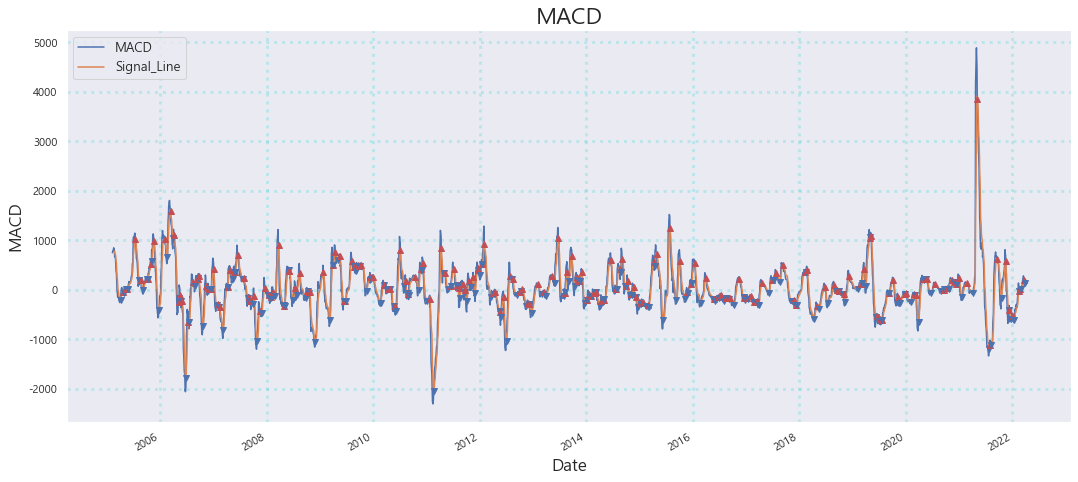

In [243]:
fig, ax1 = plt.subplots(figsize = (25, 5))
퍼시스[['MACD','Signal_Line']].plot(figsize = (18,8),ax=ax1)

for i in range(len(퍼시스.index)):
    if (퍼시스["MACD"].values[i] >=퍼시스["Signal_Line"].values[i]) and (퍼시스["MACD"].values[i-1] < 퍼시스["Signal_Line"].values[i-1]) :    #콜든크로스(매수)
        print(f"+매수 {pd.to_datetime(퍼시스.index.values[i]).strftime('%Y-%m-%d')}  {퍼시스['Close'].values[i]:.2f}")
        ax1.plot(퍼시스.index.values[i], 퍼시스['Signal_Line'].values[i], 'bv')
    elif (퍼시스["MACD"].values[i] <= 퍼시스["Signal_Line"].values[i]) and (퍼시스["MACD"].values[i-1] > 퍼시스["Signal_Line"].values[i-1]):  #데드크로스(매도)
        print(f"-매도 {pd.to_datetime(퍼시스.index.values[i]).strftime('%Y-%m-%d')}  {퍼시스['Close'].values[i]:.2f}")
        ax1.plot(퍼시스.index.values[i], 퍼시스['Signal_Line'].values[i], 'r^') 
        

ax1.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=3)
ax1.legend( loc='upper left', fontsize = 13)
plt.xlabel('Date', fontsize = 17)
plt.ylabel('MACD', fontsize = 17)
plt.title('MACD', position = (0.5,1.05), fontsize = 23);

In [274]:
#퍼시스

locale.setlocale(locale.LC_ALL, 'ko_KR')

# Create a subclass of Strategy to define the indicators and logic
class MACD(bt.Strategy):
    params = (
    # Standard MACD Parameters
    ('macd1', 12),
    ('macd2', 26),
    ('macdsig', 9),
    ('atrperiod', 14),  # ATR Period (standard)
    ('atrdist', 3.0),   # ATR distance for stop price
    ('smaperiod', 30),  # SMA Period (pretty standard)
    ('dirperiod', 10),  # Lookback period to consider SMA trend direction 
    )

    def __init__(self):
        print("---------------",self.data.close[0])#0 
        print("---------------",self.data.open[0])#4
        self.macd = bt.indicators.MACD(self.data,
                                       period_me1=self.p.macd1,
                                       period_me2=self.p.macd2,
                                       period_signal=self.p.macdsig)

        # Cross of macd.macd and macd.signal
        self.mcross = bt.indicators.CrossOver(self.macd.macd, self.macd.signal)
        self.holding = 0
        
    def next(self):
        current_stock_price = self.data.close[0]
       
        if not self.position:  # not in the market
            if self.mcross[0] > 0.0 and self.macd > self.macd.signal:
                available_stocks = self.broker.getcash() / current_stock_price
                self.buy(size=1)
        elif self.mcross[0] < 0.0 and self.macd < self.macd.signal:
            self.sell(size=1)

    
    def notify_order(self, order):
        if order.status not in [order.Completed]:
            return

        if order.isbuy():
            action = 'Buy'
        elif order.issell():
            action = 'Sell'

        stock_price = self.data.close[0]
        cash = self.broker.getcash()
        value = self.broker.getvalue()
        self.holding += order.size

        print('%s[%d] holding[%d] price[%d] cash[%.2f] value[%.2f]'
              % (action, abs(order.size), self.holding, stock_price, cash, value))


cerebro = bt.Cerebro()  # create a "Cerebro" engine instance
cerebro.broker.setcash(1000000)
cerebro.broker.setcommission(0.002)


data = bt.feeds.PandasData(dataname=df)
cerebro.adddata(data)  # Add the data feed

cerebro.addstrategy(MACD)  # Add the trading strategy

start_value = cerebro.broker.getvalue()
cerebro.run()  # run it all
final_value = cerebro.broker.getvalue()

print('* start value : %s won' % locale.format_string('%d', start_value, grouping=True))
print('* final value : %s won' % locale.format_string('%d', final_value, grouping=True))
print('* earning rate : %.2f %%' % ((final_value - start_value) / start_value * 100.0))

# cerebro.plot(style='candlestick',barup='red',bardown='blue',xtight=True,ytight=True, grid=True)

--------------- 37050.0
--------------- 36700.0
Buy[1] holding[1] price[16275] cash[984323.71] value[1000598.71]
Sell[1] holding[0] price[15225] cash[999937.42] value[999937.42]
Buy[1] holding[1] price[16170] cash[983998.61] value[1000168.61]
Sell[1] holding[0] price[16013] cash[999717.11] value[999717.11]
Buy[1] holding[1] price[16170] cash[983357.45] value[999527.45]
Sell[1] holding[0] price[16118] cash[999390.32] value[999390.32]
Buy[1] holding[1] price[16223] cash[983187.98] value[999410.98]
Sell[1] holding[0] price[20475] cash[1003517.24] value[1003517.24]
Buy[1] holding[1] price[20895] cash[982475.24] value[1003370.24]
Sell[1] holding[0] price[20475] cash[1002122.87] value[1002122.87]
Buy[1] holding[1] price[20475] cash[981028.76] value[1001503.76]
Sell[1] holding[0] price[21420] cash[1001829.08] value[1001829.08]
Buy[1] holding[1] price[21210] cash[980471.45] value[1001681.45]
Sell[1] holding[0] price[21210] cash[1001166.98] value[1001166.98]
Buy[1] holding[1] price[22050] cash[

Sell[1] holding[0] price[28000] cash[991417.23] value[991417.23]
Buy[1] holding[1] price[28000] cash[963361.23] value[991361.23]
Sell[1] holding[0] price[27750] cash[991055.73] value[991055.73]
Buy[1] holding[1] price[26950] cash[964051.83] value[991001.83]
Sell[1] holding[0] price[26000] cash[990049.73] value[990049.73]
Buy[1] holding[1] price[25650] cash[963897.53] value[989547.53]
Sell[1] holding[0] price[25350] cash[989496.23] value[989496.23]
Buy[1] holding[1] price[25350] cash[964496.33] value[989846.33]
Sell[1] holding[0] price[25750] cash[990194.83] value[990194.83]
Buy[1] holding[1] price[25800] cash[964643.83] value[990443.83]
Sell[1] holding[0] price[25250] cash[989793.43] value[989793.43]
Buy[1] holding[1] price[25600] cash[964342.63] value[989942.63]
Sell[1] holding[0] price[26500] cash[990889.43] value[990889.43]
Buy[1] holding[1] price[29250] cash[962332.43] value[991582.43]
Sell[1] holding[0] price[31900] cash[990426.13] value[990426.13]
Buy[1] holding[1] price[29000] c

Sell[1] holding[0] price[29900] cash[958892.53] value[958892.53]
Buy[1] holding[1] price[29650] cash[928932.73] value[958582.73]
Sell[1] holding[0] price[43650] cash[971497.43] value[971497.43]
Buy[1] holding[1] price[36150] cash[933972.53] value[970122.53]
Sell[1] holding[0] price[34950] cash[968403.53] value[968403.53]
Buy[1] holding[1] price[35050] cash[932582.03] value[967632.03]
Sell[1] holding[0] price[38650] cash[970855.33] value[970855.33]
Buy[1] holding[1] price[38800] cash[932077.93] value[970877.93]
Sell[1] holding[0] price[38750] cash[970600.73] value[970600.73]
Buy[1] holding[1] price[38000] cash[931723.13] value[969723.13]
Sell[1] holding[0] price[35700] cash[967601.23] value[967601.23]
Buy[1] holding[1] price[36200] cash[931378.93] value[967578.93]
Sell[1] holding[0] price[34800] cash[966358.83] value[966358.83]
Buy[1] holding[1] price[35150] cash[930837.93] value[965987.93]
Sell[1] holding[0] price[35700] cash[966167.13] value[966167.13]
Buy[1] holding[1] price[36000] c

In [148]:
이마트 = my_MACD(df, period_long = 26, period_short = 12, period_signal = 9)
이마트.tail()

,Open,High,Low,Close,Volume,MACD,Signal_Line,MACD_Hist
날짜,,,,,,,,
2022-03-25,140500,141500,138500,139000,117144,1621.673301,729.743828,891.929474
2022-03-28,138500,140000,136500,139000,119016,1575.226121,898.840286,676.385835
2022-03-29,139000,142000,138000,140000,146444,1600.656665,1039.203562,561.453103
2022-03-30,141500,142500,139000,140000,123597,1602.339779,1151.830805,450.508973
2022-03-31,140000,142500,139500,141000,120088,1665.170255,1254.498695,410.671560


In [167]:
#이마트
locale.setlocale(locale.LC_ALL, 'ko_KR')

# Create a subclass of Strategy to define the indicators and logic
class MACD(bt.Strategy):
    params = (
    # Standard MACD Parameters
    ('macd1', 12),
    ('macd2', 26),
    ('macdsig', 9),
    ('atrperiod', 14),  # ATR Period (standard)
    ('atrdist', 3.0),   # ATR distance for stop price
    ('smaperiod', 30),  # SMA Period (pretty standard)
    ('dirperiod', 10),  # Lookback period to consider SMA trend direction 
    )

    def __init__(self):
        print("---------------",self.data.close[0])#0 
        print("---------------",self.data.open[0])#4
        self.macd = bt.indicators.MACD(self.data,
                                       period_me1=self.p.macd1,
                                       period_me2=self.p.macd2,
                                       period_signal=self.p.macdsig)

        # Cross of macd.macd and macd.signal
        self.mcross = bt.indicators.CrossOver(self.macd.macd, self.macd.signal)
        self.holding = 0
        
    def next(self):
        current_stock_price = self.data.close[0]
       
        if not self.position:  # not in the market
            if self.mcross[0] > 0.0 and self.macd > self.macd.signal:
                available_stocks = self.broker.getcash() / current_stock_price
                self.buy(size=1)
        elif self.mcross[0] < 0.0 and self.macd < self.macd.signal:
            self.sell(size=1)

    
    def notify_order(self, order):
        if order.status not in [order.Completed]:
            return

        if order.isbuy():
            action = 'Buy'
        elif order.issell():
            action = 'Sell'

        stock_price = self.data.close[0]
        cash = self.broker.getcash()
        value = self.broker.getvalue()
        self.holding += order.size

        print('%s[%d] holding[%d] price[%d] cash[%.2f] value[%.2f]'
              % (action, abs(order.size), self.holding, stock_price, cash, value))


cerebro = bt.Cerebro()  # create a "Cerebro" engine instance
cerebro.broker.setcash(100000)
cerebro.broker.setcommission(0.002)


data = bt.feeds.PandasData(dataname=df)
cerebro.adddata(data)  # Add the data feed

cerebro.addstrategy(MACD)  # Add the trading strategy

start_value = cerebro.broker.getvalue()
cerebro.run()  # run it all
final_value = cerebro.broker.getvalue()

print('* start value : %s won' % locale.format_string('%d', start_value, grouping=True))
print('* final value : %s won' % locale.format_string('%d', final_value, grouping=True))
print('* earning rate : %.2f %%' % ((final_value - start_value) / start_value * 100.0))

# cerebro.plot(style='candlestick',barup='red',bardown='blue',xtight=True,ytight=True, grid=True)

--------------- 141000.0
--------------- 140000.0
* start value : 100,000 won
* final value : 100,000 won
* earning rate : 0.00 %


In [247]:
영원무역홀딩스 = my_MACD(df, period_long = 26, period_short = 12, period_signal = 9)
영원무역홀딩스.tail()

,Open,High,Low,Close,Volume,MACD,Signal_Line,MACD_Hist
날짜,,,,,,,,
2022-03-25,47950,51600,47850,50500,121349,67.247829,-385.567964,452.815793
2022-03-28,50600,52500,50300,52400,98731,479.393219,-212.575727,691.968946
2022-03-29,52900,53300,51900,52800,51638,828.744812,-4.311619,833.056432
2022-03-30,52900,54100,52400,52900,59427,1100.986149,216.747934,884.238214
2022-03-31,52900,53900,52200,53500,24562,1349.597040,443.317755,906.279284


-매도 2005-02-24  6995.00
+매수 2005-03-08  7526.00
-매도 2005-03-16  7175.00
+매수 2005-04-06  7090.00
-매도 2005-04-14  6805.00
+매수 2005-05-09  6246.00
-매도 2005-06-13  6313.00
+매수 2005-07-22  6047.00
-매도 2005-08-16  6180.00
+매수 2005-10-04  5706.00
-매도 2005-10-20  5583.00
+매수 2005-10-21  5706.00
-매도 2005-11-04  5621.00
+매수 2005-11-15  6549.00
-매도 2005-12-09  8341.00
+매수 2006-02-16  7630.00
-매도 2006-03-07  7317.00
+매수 2006-03-30  7412.00
-매도 2006-05-04  8085.00
+매수 2006-05-08  8341.00
-매도 2006-05-16  7962.00
+매수 2006-06-14  7621.00
-매도 2006-07-10  8170.00
+매수 2006-07-12  8426.00
-매도 2006-07-18  8057.00
+매수 2006-08-03  7962.00
-매도 2006-09-01  7924.00
+매수 2006-09-18  8085.00
-매도 2006-10-04  7820.00
+매수 2006-10-12  8227.00
-매도 2006-11-06  9118.00
+매수 2006-12-01  9137.00
-매도 2007-01-02  9668.00
+매수 2007-01-26  10180.00
-매도 2007-02-09  9952.00
+매수 2007-03-20  9535.00
-매도 2007-03-28  9317.00
+매수 2007-03-29  9478.00
-매도 2007-04-19  9516.00
+매수 2007-05-03  9819.00
-매도 2007-06-22  13914.00
+매수 2007-08-01

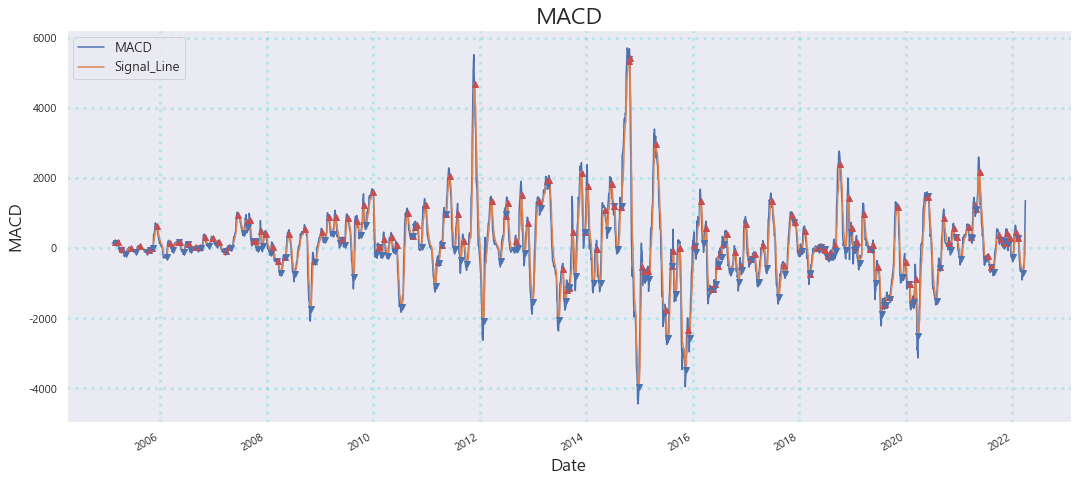

In [257]:
fig, ax1 = plt.subplots(figsize = (25, 5))
영원무역홀딩스[['MACD','Signal_Line']].plot(figsize = (18,8),ax=ax1)

for i in range(len(영원무역홀딩스.index)):
    if (영원무역홀딩스["MACD"].values[i] >=영원무역홀딩스["Signal_Line"].values[i]) and (영원무역홀딩스["MACD"].values[i-1] < 영원무역홀딩스["Signal_Line"].values[i-1]) :    #콜든크로스(매수)
        print(f"+매수 {pd.to_datetime(영원무역홀딩스.index.values[i]).strftime('%Y-%m-%d')}  {영원무역홀딩스['Close'].values[i]:.2f}")
        ax1.plot(영원무역홀딩스.index.values[i], 영원무역홀딩스['Signal_Line'].values[i], 'bv')
    elif (영원무역홀딩스["MACD"].values[i] <= 영원무역홀딩스["Signal_Line"].values[i]) and (영원무역홀딩스["MACD"].values[i-1] > 영원무역홀딩스["Signal_Line"].values[i-1]):  #데드크로스(매도)
        print(f"-매도 {pd.to_datetime(영원무역홀딩스.index.values[i]).strftime('%Y-%m-%d')}  {영원무역홀딩스['Close'].values[i]:.2f}")
        ax1.plot(영원무역홀딩스.index.values[i], 영원무역홀딩스['Signal_Line'].values[i], 'r^') 
        

ax1.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=3)
ax1.legend( loc='upper left', fontsize = 13)
plt.xlabel('Date', fontsize = 17)
plt.ylabel('MACD', fontsize = 17)
plt.title('MACD', position = (0.5,1.05), fontsize = 23);

In [258]:
#영원무역홀딩스

locale.setlocale(locale.LC_ALL, 'ko_KR')

# Create a subclass of Strategy to define the indicators and logic
class MACD(bt.Strategy):
    params = (
    # Standard MACD Parameters
    ('macd1', 12),
    ('macd2', 26),
    ('macdsig', 9),
    ('atrperiod', 14),  # ATR Period (standard)
    ('atrdist', 3.0),   # ATR distance for stop price
    ('smaperiod', 30),  # SMA Period (pretty standard)
    ('dirperiod', 10),  # Lookback period to consider SMA trend direction 
    )

    def __init__(self):
        print("---------------",self.data.close[0])#0 
        print("---------------",self.data.open[0])#4
        self.macd = bt.indicators.MACD(self.data,
                                       period_me1=self.p.macd1,
                                       period_me2=self.p.macd2,
                                       period_signal=self.p.macdsig)

        # Cross of macd.macd and macd.signal
        self.mcross = bt.indicators.CrossOver(self.macd.macd, self.macd.signal)
        self.holding = 0
        
    def next(self):
        current_stock_price = self.data.close[0]
       
        if not self.position:  # not in the market
            if self.mcross[0] > 0.0 and self.macd > self.macd.signal:
                available_stocks = self.broker.getcash() / current_stock_price
                self.buy(size=1)
        elif self.mcross[0] < 0.0 and self.macd < self.macd.signal:
            self.sell(size=1)

    
    def notify_order(self, order):
        if order.status not in [order.Completed]:
            return

        if order.isbuy():
            action = 'Buy'
        elif order.issell():
            action = 'Sell'

        stock_price = self.data.close[0]
        cash = self.broker.getcash()
        value = self.broker.getvalue()
        self.holding += order.size

        print('%s[%d] holding[%d] price[%d] cash[%.2f] value[%.2f]'
              % (action, abs(order.size), self.holding, stock_price, cash, value))


cerebro = bt.Cerebro()  # create a "Cerebro" engine instance
cerebro.broker.setcash(100000)
cerebro.broker.setcommission(0.002)


data = bt.feeds.PandasData(dataname=df)
cerebro.adddata(data)  # Add the data feed

cerebro.addstrategy(MACD)  # Add the trading strategy

start_value = cerebro.broker.getvalue()
cerebro.run()  # run it all
final_value = cerebro.broker.getvalue()

print('* start value : %s won' % locale.format_string('%d', start_value, grouping=True))
print('* final value : %s won' % locale.format_string('%d', final_value, grouping=True))
print('* earning rate : %.2f %%' % ((final_value - start_value) / start_value * 100.0))

# cerebro.plot(style='candlestick',barup='red',bardown='blue',xtight=True,ytight=True, grid=True)

--------------- 53500.0
--------------- 52900.0
Buy[1] holding[1] price[7526] cash[92384.80] value[99910.80]
Sell[1] holding[0] price[6976] cash[99383.77] value[99383.77]
Buy[1] holding[1] price[7147] cash[92281.60] value[99428.60]
Sell[1] holding[0] price[6692] cash[98949.24] value[98949.24]
Buy[1] holding[1] price[6275] cash[92597.56] value[98872.56]
Sell[1] holding[0] price[6275] cash[98933.86] value[98933.86]
Buy[1] holding[1] price[6038] cash[92800.62] value[98838.62]
Sell[1] holding[0] price[6199] cash[98966.26] value[98966.26]
Buy[1] holding[1] price[5659] cash[93250.85] value[98909.85]
Sell[1] holding[0] price[5706] cash[98773.79] value[98773.79]
Buy[1] holding[1] price[5877] cash[92982.23] value[98859.23]
Sell[1] holding[0] price[5696] cash[98656.85] value[98656.85]
Buy[1] holding[1] price[7526] cash[91459.49] value[98985.49]
Sell[1] holding[0] price[8379] cash[99838.70] value[99838.70]
Buy[1] holding[1] price[8019] cash[91919.89] value[99938.89]
Sell[1] holding[0] price[7440]

Sell[1] holding[0] price[61200] cash[123198.20] value[123198.20]
Buy[1] holding[1] price[63600] cash[57567.20] value[121167.20]
Sell[1] holding[0] price[70000] cash[127626.80] value[127626.80]
Buy[1] holding[1] price[70100] cash[55583.00] value[125683.00]
Sell[1] holding[0] price[71600] cash[125542.80] value[125542.80]
Buy[1] holding[1] price[73000] cash[53599.20] value[126599.20]
Sell[1] holding[0] price[75800] cash[129846.40] value[129846.40]
Buy[1] holding[1] price[69100] cash[59806.60] value[128906.60]
Sell[1] holding[0] price[66600] cash[128568.80] value[128568.80]
Buy[1] holding[1] price[69500] cash[59831.60] value[129331.60]
Sell[1] holding[0] price[71800] cash[131887.20] value[131887.20]
Buy[1] holding[1] price[78000] cash[56136.00] value[134136.00]
Sell[1] holding[0] price[79000] cash[134578.80] value[134578.80]
Buy[1] holding[1] price[81100] cash[53116.20] value[134216.20]
Sell[1] holding[0] price[81300] cash[134852.40] value[134852.40]
Buy[1] holding[1] price[80500] cash[550

In [261]:
OCI = my_MACD(df, period_long = 26, period_short = 12, period_signal = 9)
OCI.tail()

,Open,High,Low,Close,Volume,MACD,Signal_Line,MACD_Hist
날짜,,,,,,,,
2022-03-25,115000,115500,108500,109000,428785,3299.688487,3447.243574,-147.555087
2022-03-28,107500,108000,104500,105500,356992,2715.987951,3300.992450,-585.004499
2022-03-29,106500,107000,102500,104500,323574,2147.949206,3070.383801,-922.434595
2022-03-30,105000,106000,103000,104000,183023,1638.540512,2784.015143,-1145.474631
2022-03-31,103500,106000,103500,105000,198656,1300.530390,2487.318193,-1186.787802


-매도 2005-03-15  18750.00
+매수 2005-03-22  20400.00
-매도 2005-04-08  21300.00
+매수 2005-05-24  20400.00
-매도 2005-06-03  19700.00
+매수 2005-06-17  20400.00
-매도 2005-07-18  23500.00
+매수 2005-07-25  25400.00
-매도 2005-08-03  25050.00
+매수 2005-09-05  24700.00
-매도 2005-09-14  24100.00
+매수 2005-09-21  25400.00
-매도 2005-10-13  28450.00
+매수 2005-11-04  28600.00
-매도 2005-11-22  28450.00
+매수 2006-01-10  27200.00
-매도 2006-01-26  30000.00
+매수 2006-02-10  32100.00
-매도 2006-03-06  32800.00
+매수 2006-03-20  34050.00
-매도 2006-03-21  32900.00
+매수 2006-03-30  34400.00
-매도 2006-05-12  39000.00
+매수 2006-06-16  33900.00
-매도 2006-07-24  34500.00
+매수 2006-07-27  35850.00
-매도 2006-07-31  34800.00
+매수 2006-08-02  37000.00
-매도 2006-08-11  35950.00
+매수 2006-08-14  36400.00
-매도 2006-09-08  40800.00
+매수 2006-09-21  44500.00
-매도 2006-10-10  44650.00
+매수 2006-10-18  47450.00
-매도 2006-10-24  46650.00
+매수 2006-12-15  44750.00
-매도 2007-01-05  44400.00
+매수 2007-01-30  43600.00
-매도 2007-03-02  44350.00
+매수 2007-03-13  47950.00


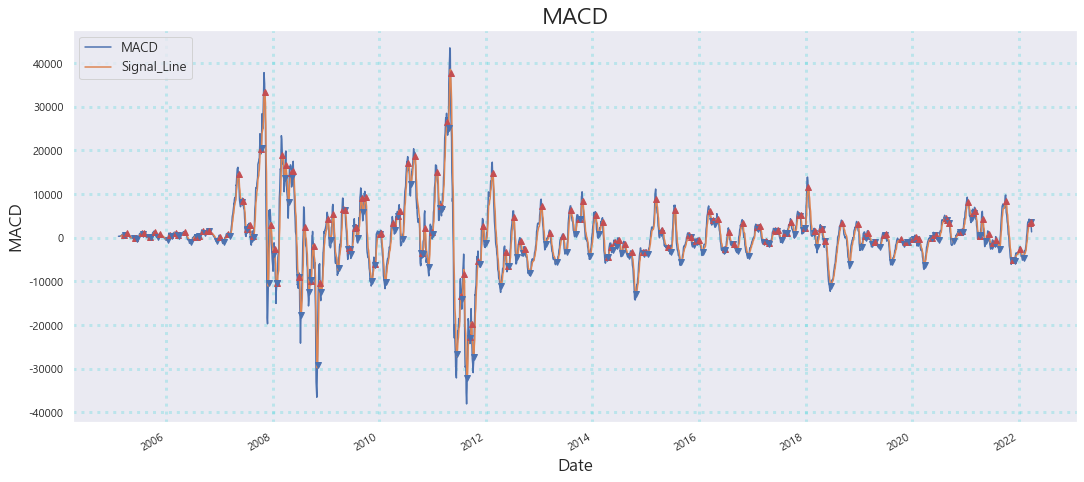

In [264]:
fig, ax1 = plt.subplots(figsize = (25, 5))
OCI[['MACD','Signal_Line']].plot(figsize = (18,8),ax=ax1)

for i in range(len(OCI.index)):
    if (OCI["MACD"].values[i] >= OCI["Signal_Line"].values[i]) and (OCI["MACD"].values[i-1] < OCI["Signal_Line"].values[i-1]) :    #콜든크로스(매수)
        print(f"+매수 {pd.to_datetime(OCI.index.values[i]).strftime('%Y-%m-%d')}  {OCI['Close'].values[i]:.2f}")
        ax1.plot(df.index.values[i], OCI['Signal_Line'].values[i], 'bv')
    elif (OCI["MACD"].values[i] <= OCI["Signal_Line"].values[i]) and (OCI["MACD"].values[i-1] > OCI["Signal_Line"].values[i-1]):  #데드크로스(매도)
        print(f"-매도 {pd.to_datetime(OCI.index.values[i]).strftime('%Y-%m-%d')}  {OCI['Close'].values[i]:.2f}")
        ax1.plot(OCI.index.values[i], OCI['Signal_Line'].values[i], 'r^') 
        

ax1.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=3)
ax1.legend( loc='upper left', fontsize = 13)
plt.xlabel('Date', fontsize = 17)
plt.ylabel('MACD', fontsize = 17)
plt.title('MACD', position = (0.5,1.05), fontsize = 23);

In [266]:
#OCI

locale.setlocale(locale.LC_ALL, 'ko_KR')

# Create a subclass of Strategy to define the indicators and logic
class MACD(bt.Strategy):
    params = (
    # Standard MACD Parameters
    ('macd1', 12),
    ('macd2', 26),
    ('macdsig', 9),
    ('atrperiod', 14),  # ATR Period (standard)
    ('atrdist', 3.0),   # ATR distance for stop price
    ('smaperiod', 30),  # SMA Period (pretty standard)
    ('dirperiod', 10),  # Lookback period to consider SMA trend direction 
    )

    def __init__(self):
        print("---------------",self.data.close[0])#0 
        print("---------------",self.data.open[0])#4
        self.macd = bt.indicators.MACD(self.data,
                                       period_me1=self.p.macd1,
                                       period_me2=self.p.macd2,
                                       period_signal=self.p.macdsig)

        # Cross of macd.macd and macd.signal
        self.mcross = bt.indicators.CrossOver(self.macd.macd, self.macd.signal)
        self.holding = 0
        
    def next(self):
        current_stock_price = self.data.close[0]
       
        if not self.position:  # not in the market
            if self.mcross[0] > 0.0 and self.macd > self.macd.signal:
                available_stocks = self.broker.getcash() / current_stock_price
                self.buy(size=1)
        elif self.mcross[0] < 0.0 and self.macd < self.macd.signal:
            self.sell(size=1)

    
    def notify_order(self, order):
        if order.status not in [order.Completed]:
            return

        if order.isbuy():
            action = 'Buy'
        elif order.issell():
            action = 'Sell'

        stock_price = self.data.close[0]
        cash = self.broker.getcash()
        value = self.broker.getvalue()
        self.holding += order.size

        print('%s[%d] holding[%d] price[%d] cash[%.2f] value[%.2f]'
              % (action, abs(order.size), self.holding, stock_price, cash, value))


cerebro = bt.Cerebro()  # create a "Cerebro" engine instance
cerebro.broker.setcash(1000000)
cerebro.broker.setcommission(0.002)


data = bt.feeds.PandasData(dataname=df)
cerebro.adddata(data)  # Add the data feed

cerebro.addstrategy(MACD)  # Add the trading strategy

start_value = cerebro.broker.getvalue()
cerebro.run()  # run it all
final_value = cerebro.broker.getvalue()

print('* start value : %s won' % locale.format_string('%d', start_value, grouping=True))
print('* final value : %s won' % locale.format_string('%d', final_value, grouping=True))
print('* earning rate : %.2f %%' % ((final_value - start_value) / start_value * 100.0))

# cerebro.plot(style='candlestick',barup='red',bardown='blue',xtight=True,ytight=True, grid=True)

--------------- 105000.0
--------------- 103500.0
Buy[1] holding[1] price[20250] cash[979759.60] value[1000009.60]
Sell[1] holding[0] price[21300] cash[1000717.60] value[1000717.60]
Buy[1] holding[1] price[20400] cash[980577.40] value[1000977.40]
Sell[1] holding[0] price[19350] cash[1000437.60] value[1000437.60]
Buy[1] holding[1] price[20800] cash[979796.40] value[1000596.40]
Sell[1] holding[0] price[23500] cash[1003149.60] value[1003149.60]
Buy[1] holding[1] price[25700] cash[978099.60] value[1003799.60]
Sell[1] holding[0] price[24000] cash[1003249.20] value[1003249.20]
Buy[1] holding[1] price[25700] cash[978499.80] value[1004199.80]
Sell[1] holding[0] price[24000] cash[1002252.20] value[1002252.20]
Buy[1] holding[1] price[25650] cash[977202.20] value[1002852.20]
Sell[1] holding[0] price[28800] cash[1005345.80] value[1005345.80]
Buy[1] holding[1] price[28200] cash[976638.50] value[1004838.50]
Sell[1] holding[0] price[29200] cash[1005231.20] value[1005231.20]
Buy[1] holding[1] price[29

Sell[1] holding[0] price[179500] cash[876584.90] value[876584.90]
Buy[1] holding[1] price[171500] cash[704741.90] value[876241.90]
Sell[1] holding[0] price[170500] cash[876397.90] value[876397.90]
Buy[1] holding[1] price[138500] cash[736117.90] value[874617.90]
Sell[1] holding[0] price[143500] cash[877334.90] value[877334.90]
Buy[1] holding[1] price[136000] cash[740561.90] value[876561.90]
Sell[1] holding[0] price[161000] cash[900740.90] value[900740.90]
Buy[1] holding[1] price[167000] cash[736913.90] value[903913.90]
Sell[1] holding[0] price[176500] cash[910565.90] value[910565.90]
Buy[1] holding[1] price[180000] cash[730205.90] value[910205.90]
Sell[1] holding[0] price[179500] cash[906851.90] value[906851.90]
Buy[1] holding[1] price[192500] cash[717974.90] value[910474.90]
Sell[1] holding[0] price[196500] cash[908592.90] value[908592.90]
Buy[1] holding[1] price[176000] cash[732240.90] value[908240.90]
Sell[1] holding[0] price[186000] cash[917868.90] value[917868.90]
Buy[1] holding[1]

Buy[1] holding[1] price[117500] cash[783994.30] value[901494.30]
Sell[1] holding[0] price[112000] cash[888784.30] value[888784.30]
Buy[1] holding[1] price[112500] cash[774055.30] value[886555.30]
Sell[1] holding[0] price[94500] cash[869863.30] value[869863.30]
Buy[1] holding[1] price[96000] cash[778280.50] value[874280.50]
Sell[1] holding[0] price[115000] cash[889557.50] value[889557.50]
Buy[1] holding[1] price[109000] cash[774327.50] value[883327.50]
Sell[1] holding[0] price[105500] cash[881612.50] value[881612.50]
* start value : 1,000,000 won
* final value : 881,612 won
* earning rate : -11.84 %


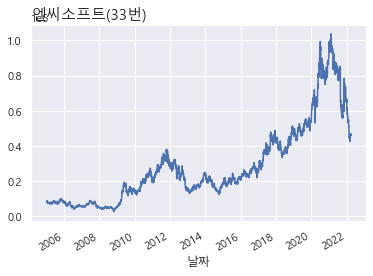

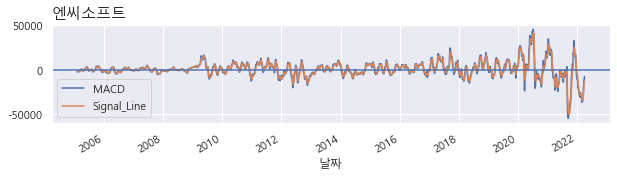

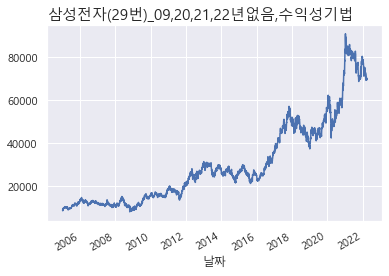

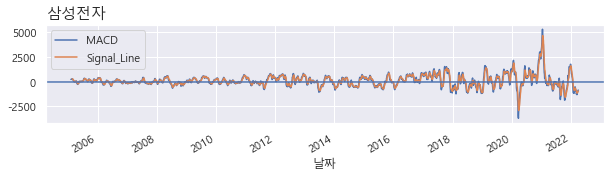

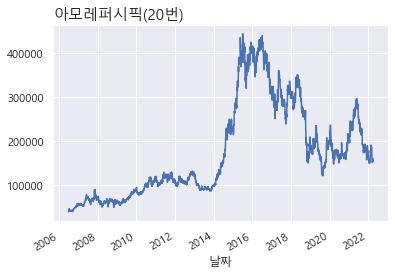

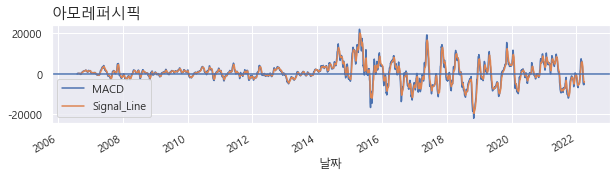

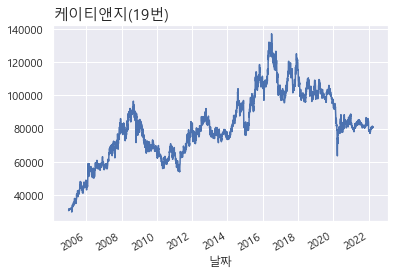

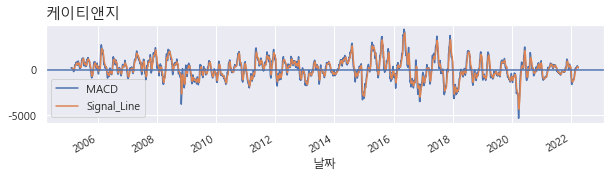

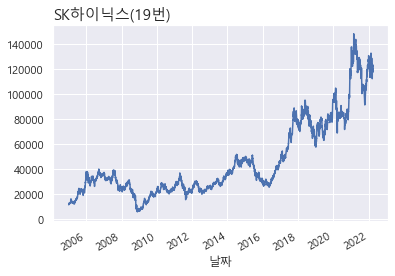

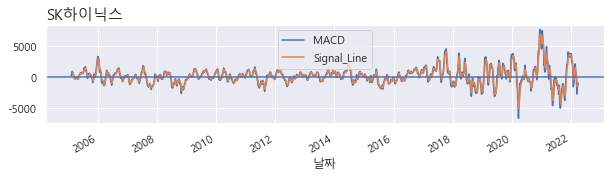

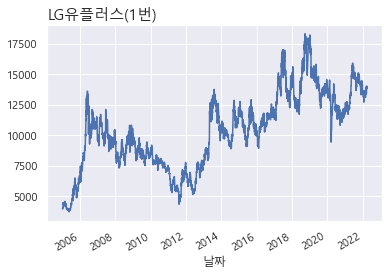

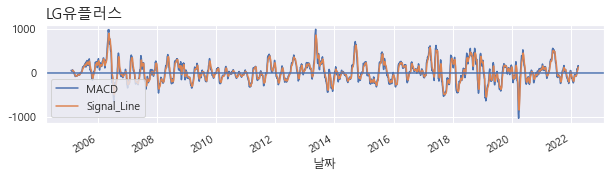

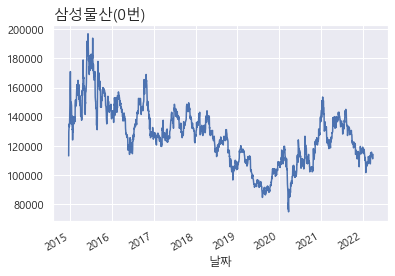

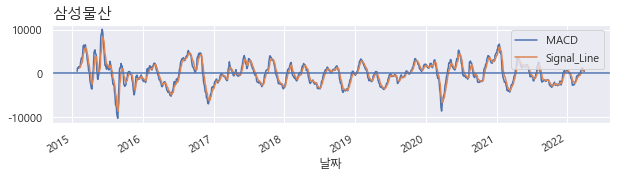

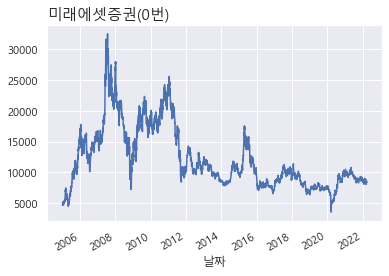

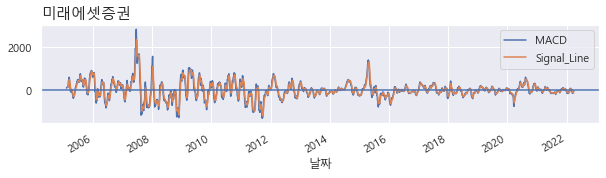

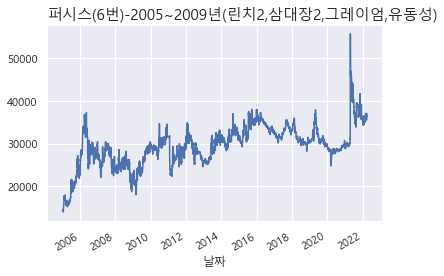

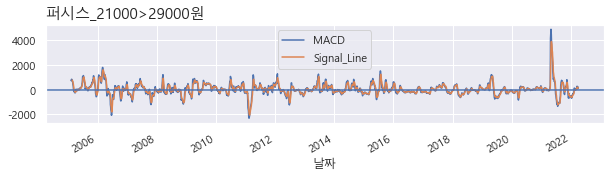

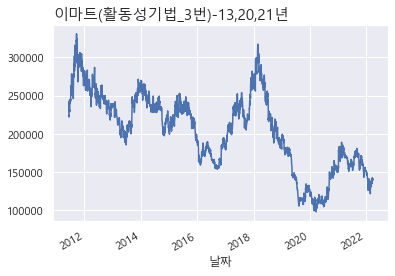

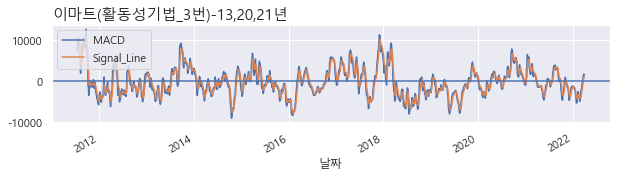

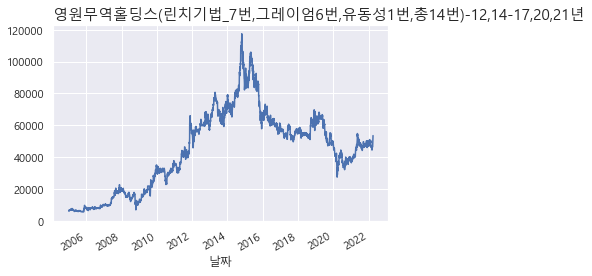

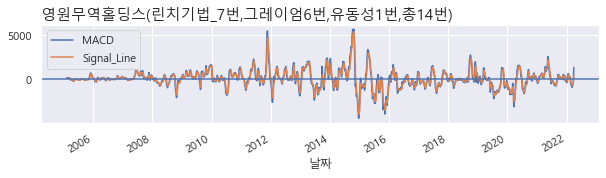

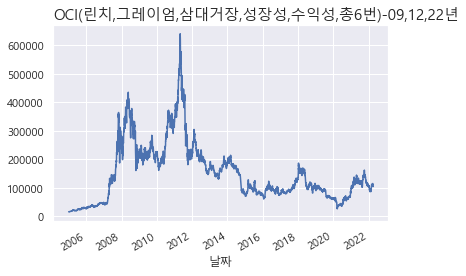

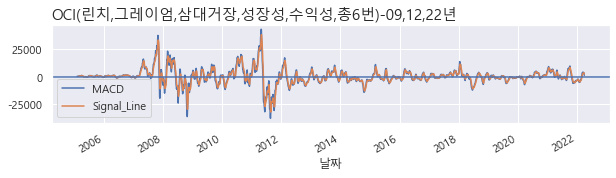

In [275]:
plt.rcParams['font.family']= 'Malgun Gothic'

엔씨소프트["Close"].plot()       
plt.title('엔씨소프트(33번)', size= 15, rotation = 0, loc = 'left')
엔씨소프트[["MACD", "Signal_Line"]].plot(figsize=(10,2))
plt.title('엔씨소프트', size= 15, rotation = 0, loc = 'left')
plt.axhline(0)
plt.show()

삼성전자["Close"].plot()
plt.title('삼성전자(29번)_09,20,21,22년없음,수익성기법', size= 15, rotation = 0, loc = 'left')
삼성전자[["MACD", "Signal_Line"]].plot(figsize=(10,2))
plt.title('삼성전자', size= 15, rotation = 0, loc = 'left')
plt.axhline(0)
plt.show()

아모레퍼시픽["Close"].plot()
plt.title('아모레퍼시픽(20번)', size= 15, rotation = 0, loc = 'left')
아모레퍼시픽[["MACD", "Signal_Line"]].plot(figsize=(10,2))
plt.title('아모레퍼시픽', size= 15, rotation = 0, loc = 'left')
plt.axhline(0)
plt.show()

케이티앤지["Close"].plot()
plt.title('케이티앤지(19번)', size= 15, rotation = 0, loc = 'left')
케이티앤지[["MACD", "Signal_Line"]].plot(figsize=(10,2))
plt.title('케이티앤지', size= 15, rotation = 0, loc = 'left')
plt.axhline(0)
plt.show()


SK하이닉스["Close"].plot()
plt.title('SK하이닉스(19번)', size= 15, rotation = 0, loc = 'left')
SK하이닉스[["MACD", "Signal_Line"]].plot(figsize=(10,2))
plt.title('SK하이닉스', size= 15, rotation = 0, loc = 'left')
plt.axhline(0)
plt.show()

LG유플러스["Close"].plot()
plt.title('LG유플러스(1번)', size= 15, rotation = 0, loc = 'left')
LG유플러스[["MACD", "Signal_Line"]].plot(figsize=(10,2))
plt.title('LG유플러스', size= 15, rotation = 0, loc = 'left')
plt.axhline(0)
plt.show()

삼성물산["Close"].plot()
plt.title('삼성물산(0번)', size= 15, rotation = 0, loc = 'left')
삼성물산[["MACD", "Signal_Line"]].plot(figsize=(10,2))
plt.title('삼성물산', size= 15, rotation = 0, loc = 'left')
plt.axhline(0)
plt.show()

미래에셋증권["Close"].plot()
plt.title('미래에셋증권(0번)', size= 15, rotation = 0, loc = 'left')
미래에셋증권[["MACD", "Signal_Line"]].plot(figsize=(10,2))
plt.title('미래에셋증권', size= 15, rotation = 0, loc = 'left')
plt.axhline(0)
plt.show()

퍼시스["Close"].plot()
plt.title('퍼시스(6번)-2005~2009년(린치2,삼대장2,그레이엄,유동성)', size= 15, rotation = 0, loc = 'left')
퍼시스[["MACD", "Signal_Line"]].plot(figsize=(10,2))
plt.title('퍼시스_21000>29000원', size= 15, rotation = 0, loc = 'left')
plt.axhline(0)
plt.show()

이마트["Close"].plot()
plt.title('이마트(활동성기법_3번)-13,20,21년', size= 15, rotation = 0, loc = 'left')
이마트[["MACD", "Signal_Line"]].plot(figsize=(10,2))
plt.title('이마트(활동성기법_3번)-13,20,21년', size= 15, rotation = 0, loc = 'left')
plt.axhline(0)
plt.show()

영원무역홀딩스["Close"].plot()
plt.title('영원무역홀딩스(린치기법_7번,그레이엄6번,유동성1번,총14번)-12,14-17,20,21년', size= 15, rotation = 0, loc = 'left')
영원무역홀딩스[["MACD", "Signal_Line"]].plot(figsize=(10,2))
plt.title('영원무역홀딩스(린치기법_7번,그레이엄6번,유동성1번,총14번)', size= 15, rotation = 0, loc = 'left')
plt.axhline(0)
plt.show()

OCI["Close"].plot()  #성장성,수익성은 12년에 매수추천, 12년에 매수하면 물렸음. 2022년 3월 매수시 약간의 수익
plt.title('OCI(린치,그레이엄,삼대거장,성장성,수익성,총6번)-09,12,22년', size= 15, rotation = 0, loc = 'left')   
OCI[["MACD", "Signal_Line"]].plot(figsize=(10,2))
plt.title('OCI(린치,그레이엄,삼대거장,성장성,수익성,총6번)-09,12,22년', size= 15, rotation = 0, loc = 'left')
plt.axhline(0)
plt.show()